In [131]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Load environment variabless
from dotenv import load_dotenv
from pathlib import Path

# Load .env file from general directory
env_path = Path('../../general/.env')
load_dotenv(env_path);

In [132]:
# Get path from environment variables
path_prop = os.getenv('path_prop')

# Use the path from environment
path = path_prop

In [133]:
# read all csv files in the folder
all_files = glob.glob(os.path.join(path_prop, "*.csv"))

# create an empty list to store dataframes
dfs = []

# loop through all files and read them into a dataframe
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=';')
    dfs.append(df)

# concatenate all dataframes into one
df = pd.concat(dfs, axis=0, ignore_index=True)

# drop duplicates
df = df.drop_duplicates()

# df.tail(3)

In [134]:
df.shape

(15830, 23)

In [135]:
# df.tail(5)

### Year Filter

In [136]:
# # # Add year filter on column df.Year, to filter current year
# # current_year = pd.Timestamp.now().year
# # df = df[df['Year'] < current_year]

# # As alternative, filter for specific year, e.g., 2025
# df = df[df['Year'] == 2025]

### Symbol Filter

In [137]:
# # filter for specific Simbolo, e.g., US100
# df = df[df['Simbolo'] == 'US100']

### Account_Type Filter

In [138]:
# # filter for specific Account_Type, e.g., Funded
# df = df[df['Account_Type'] == 'Funded']

In [139]:
# # if df.Account_Type contains 'Founded' change it to 'Funded'
# df['Account_Type'] = df['Account_Type'].replace('Founded', 'Funded')

In [140]:
# df.Account_Type.unique()

In [141]:
df.columns

Index(['Ticket', 'Apri', 'Tipologia', 'Volume', 'Simbolo', 'Prezzo', 'SL',
       'TP', 'Chiudi', 'Prezzo.1', 'Swap', 'Commissioni', 'Profitto', 'Pips',
       'Duratadeltradeinsecondi', 'Account_Type', 'Account_Amount',
       'Profit_pct', 'Month', 'Year', 'Asset', 'Prop', 'Day'],
      dtype='object')

In [142]:
# from column Ticket, drop duplicates and keep the first occurrence
# Is required especially for 5%, FNEXT and MyFX where there is no account reset
df = df.drop_duplicates(subset=['Ticket'], keep='first')

# drop Ticket
# df = df.drop(columns=['Ticket'])

In [143]:
df.shape

(15774, 23)

In [144]:
# 'Tipologia' column, uppercase
df['Tipologia'] = df['Tipologia'].str.upper()

# # Check 'Tipologia' column for unique values
# unique_values = df['Tipologia'].unique()
# unique_values

In [145]:
# rename values in column Simbolo
df['Simbolo'] = df['Simbolo'].replace({'US100.cash': 'US100',
                                        'NAS100': 'US100', 
                                       'UK100.cash' : 'UK100',
                                        'FRA40.cash': 'FRA40',
                                        'USOIL.cash': 'USOIL',
                                        'USOUSD': 'USOIL',
                                        'XBRUSD': 'USOIL',
                                        'UKOIL.cash': 'UKOIL',
                                       'US500.cash': 'US500',
                                        'SP500': 'US500', 
                                       'US30.cash': 'US30', 
                                       'US2000.cash': 'US2000', 
                                       'SPX500': 'US500', 
                                       'NDX100': 'US100',
                                        'SPN35.cash': 'SPN35',
                                       'GER30': 'GER40',
                                        'DAX40': 'GER40',
                                        'JP225.cash': 'JP225',
                                       'GER40.cash': 'GER40'})

In [146]:
# unique values column Simbolo
# print list of assets
print(df['Simbolo'].unique())

# print number of unique assets
print('Number of unique assets:', df['Simbolo'].nunique())

['US30' 'US500' 'GER40' 'EURUSD' 'BTCUSD' 'CADJPY' 'AUDJPY' 'USDCAD'
 'EURJPY' 'US100' 'TSLA' 'RACE' 'MSFT' 'AAPL' 'AMZN' 'ZM' 'META' 'NVDA'
 'GOOG' 'V' 'GBPUSD' 'ETHUSD' 'BAC' 'AUDUSD' 'XAUUSD' 'NFLX' 'FRA40'
 'XAGUSD' 'BABA' 'USOIL' 'GBPJPY' 'CHFJPY' 'USDJPY' 'EURCHF' 'US2000'
 'LVMH' 'USDCHF' 'AUDCAD' 'PFE' 'UK100' 'EURGBP' 'EURCAD' 'WMT' 'SPN35'
 'DOGEUSD' 'NZDUSD' 'NZDJPY' 'GBPCAD' 'UKOIL' 'DOGUSD' 'LTCUSD' 'JP225'
 'EUSTX50' 'AUDCHF' 'GBPNZD' 'T' 'JPN225' 'DBKGn' 'VOWG_p' 'ALVG' 'BNBUSD'
 'SOLUSD']
Number of unique assets: 62


In [147]:
# # Calculate the total profit for each symbol
# best_simbol = df.groupby('Simbolo')['Profitto'].sum().sort_values(ascending=False).round(2) 

# # Convert the result to a DataFrame
# best_simbol = best_simbol.reset_index()

# # Rename the columns
# best_simbol.columns = ['Simbolo', 'Profitto']

# # Display the result
# best_simbol.head(10)

In [148]:
# # check Profitto for Simbolo 'WMT'
# profitto_ = best_simbol[best_simbol['Simbolo'] == 'V']
# profitto_

In [149]:
# # check Profitto for Simbolo 'WMT'
# profitto2_ = best_simbol[best_simbol['Simbolo'] == 'AMZN']
# profitto2_

In [150]:
# # worst symbols
# worst_simbol =  best_simbol.sort_values(by='Profitto', ascending=True).head(10)
# worst_simbol

In [151]:
# # Calculate total profit from column 'Profitto'
# total_profit = df['Profitto'].sum().round(2)

# # Display the result
# total_profit

In [152]:
# # Calculate cumulative profit for each Asset
# cumulative_profit_asset = df.groupby('Asset')['Profitto'].sum().reset_index()

# # Rename the columns
# cumulative_profit_asset.columns = ['Asset', 'Cumulative_Profit']

# # sort values by Cumulative_Profit
# cumulative_profit_asset = cumulative_profit_asset.sort_values(by='Cumulative_Profit', ascending=False)

# # Display the result
# cumulative_profit_asset

### "Unknown" Analysis in column Asset (If Any)

In [153]:
# # Fix Unknown in column Asset

# # check Unknown in column Asset
# df[df['Asset'] == 'Unknown']

# """
# df.Simbolo == 'GBPNZD' -> df.Asset == 'Forex'
# df.Simbolo == 'T' -> df.Asset == 'Stocks'
# """
# # fix Unknown in column Asset
# df.loc[df['Simbolo'] == 'GBPNZD', 'Asset'] = 'Forex'
# df.loc[df['Simbolo'] == 'T', 'Asset'] = 'Stocks'

In [154]:
# # check df['Asset'] == Unknown
# df[df['Asset'] == 'Unknown']

In [155]:
# First method to calculate the average profit per trade for each symbol
best_simbol_avg = df.groupby('Simbolo')['Profitto'].mean().sort_values(ascending=False).round(2)

# Convert the result to a DataFrame
best_simbol_avg = best_simbol_avg.reset_index()

# Rename the columns
best_simbol_avg.columns = ['Simbolo', 'Average_Profit']

# Display the result
best_simbol_avg.head(10)

,Simbolo,Average_Profit
0,XAGUSD,6885.00
1,LVMH,140.64
2,USOIL,76.73
3,NVDA,31.11
4,DOGUSD,27.68
5,AUDCAD,26.69
6,GBPJPY,20.20
7,US100,18.92
8,XAUUSD,15.13
9,GBPNZD,14.87


In [156]:
# # Second method to calculate the average profit per trade for each symbol

# # Calculate the number of trades for each symbol
# trades_count = df.groupby('Simbolo')['Ticket'].count().sort_values(ascending=False)
# trades_count.head(10)

# # Calculate the profit for each symbol
# best_simbol_avg2 = best_simbol.set_index('Simbolo')['Profitto'] / trades_count
# best_simbol_avg2.sort_values(ascending=False).round(2).head(10)

# # Convert the result to a DataFrame
# best_simbol_avg2 = best_simbol_avg2.reset_index()

# # Rename the columns
# best_simbol_avg2.columns = ['Simbolo', 'Average_Profit']

# # Display the result
# best_simbol_avg2.sort_values(by='Average_Profit', ascending=False).head(10)

In [157]:
# # Convert trades_count to DataFrame
# trades_count_df = trades_count.reset_index()

# # Rename the columns
# trades_count_df.columns = ['Simbolo', 'Trades_Count']

# # Merge the two DataFrames on 'Simbolo'
# merged_df = pd.merge(best_simbol_avg, trades_count_df, on='Simbolo')

# # Display the merged DataFrame
# merged_df.sort_values(by='Average_Profit', ascending=False).head(10)

In [158]:
# Create a copy of the dataframe
# df_100 will be the dataset used as a reference for the calculations 
# (virtual balance 100k USD)

# With this scenario, we will simulate how all strategies applied to the 100k 
# account would have performed

df_100 = df.copy()

# Add the column Profitto_100 with calculated values 
# (virtual profit on 100k USD balance)
df_100['Profitto_100'] = np.where(
    df_100['Account_Amount'] == 5000, df_100['Profitto'] * 20,
    np.where(
        df_100['Account_Amount'] == 20000, df_100['Profitto'] * 5,
        np.where(
            df_100['Account_Amount'] == 25000, df_100['Profitto'] * 4,
            np.where(
                df_100['Account_Amount'] == 40000, df_100['Profitto'] * 2.5,
                np.where(
                    df_100['Account_Amount'] == 50000, df_100['Profitto'] * 2,
                    np.where(
                        df_100['Account_Amount'] == 100000, df_100['Profitto'] * 1,
                        np.where(
                            df_100['Account_Amount'] == 200000, df_100['Profitto'] / 2,
                            np.nan  # Handle unexpected values
                        )
                    )
                )
            )
        )
    )
)

In [159]:
# Check the new column and profitto column
df_100[['Profitto', 'Account_Amount', 'Profitto_100']].sample(10)

,Profitto,Account_Amount,Profitto_100
2738,261.17,50000,522.34
1727,-0.90,100000,-0.90
3225,-15.70,50000,-31.40
5359,0.38,50000,0.76
5826,-156.09,25000,-624.36
4926,-1.38,100000,-1.38
3231,66.00,50000,132.00
3626,22.86,100000,22.86
13146,-42.40,100000,-42.40
5978,1.99,50000,3.98


### Trades Commissions Analysis

In [160]:
# Add the column Profitto_100 with calculated values 
# (virtual profit on 100k USD balance)
df_100['Swap_100'] = np.where(
    df_100['Account_Amount'] == 5000, df_100['Swap'] * 20,
    np.where(
        df_100['Account_Amount'] == 20000, df_100['Swap'] * 5,
        np.where(
            df_100['Account_Amount'] == 25000, df_100['Swap'] * 4,
            np.where(
                df_100['Account_Amount'] == 40000, df_100['Swap'] * 2.5,
                np.where(
                    df_100['Account_Amount'] == 50000, df_100['Swap'] * 2,
                    np.where(
                        df_100['Account_Amount'] == 100000, df_100['Swap'] * 1,
                        np.where(
                            df_100['Account_Amount'] == 200000, df_100['Swap'] / 2,
                            np.nan  # Handle unexpected values
                        )
                    )
                )
            )
        )
    )
)

# Add the column Profitto_100 with calculated values (virtual profit on 100k USD balance)
df_100['Commissioni_100'] = np.where(
    df_100['Account_Amount'] == 5000, df_100['Commissioni'] * 20,
    np.where(
        df_100['Account_Amount'] == 20000, df_100['Commissioni'] * 5,
        np.where(
            df_100['Account_Amount'] == 25000, df_100['Commissioni'] * 4,
            np.where(
                df_100['Account_Amount'] == 40000, df_100['Commissioni'] * 2.5,
                np.where(
                    df_100['Account_Amount'] == 50000, df_100['Commissioni'] * 2,
                    np.where(
                        df_100['Account_Amount'] == 100000, df_100['Commissioni'] * 1,
                        np.where(
                            df_100['Account_Amount'] == 200000, df_100['Commissioni'] / 2,
                            np.nan  # Handle unexpected values
                        )
                    )
                )
            )
        )
    )
)

# Add column 'Tot_Commissioni_100' as sum of 'Commissioni_100' and 'Swap_100'
df_100['Tot_Commissioni_100'] = df_100['Commissioni_100'] + df_100['Swap_100']

In [161]:
# Check columns
df_100[['Commissioni', 'Swap', 'Account_Amount','Commissioni_100', 'Swap_100', 'Tot_Commissioni_100']].sample(10)

,Commissioni,Swap,Account_Amount,Commissioni_100,Swap_100,Tot_Commissioni_100
2786,0.00,0.00,50000,0.00,0.00,0.00
4163,0.00,0.00,50000,0.00,0.00,0.00
1259,0.00,0.00,20000,0.00,0.00,0.00
7942,-0.04,0.00,5000,-0.80,0.00,-0.80
9464,0.00,0.00,100000,0.00,0.00,0.00
6391,0.00,0.00,50000,0.00,0.00,0.00
6824,-0.12,0.85,100000,-0.12,0.85,0.73
3937,0.00,-1.01,50000,0.00,-2.02,-2.02
1621,-0.63,-5.15,100000,-0.63,-5.15,-5.78
14403,0.00,-11.00,100000,0.00,-11.00,-11.00


In [162]:
# drop Commissioni_100	Swap_100
df_100 = df_100.drop(columns=['Commissioni_100', 'Swap_100'])

# Column Profitto_100 is sum of Profitto_100 and Tot_Commissioni_100
df_100['Profitto_100'] = df_100['Profitto_100'] + df_100['Tot_Commissioni_100']

In [163]:
# total amount paid in commissions and swap
total_commissions_100 = -df_100['Tot_Commissioni_100'].sum().round(2)

# print total amount paid in commissions and swap
print('Total commissions and swap paid (USD):', total_commissions_100)

Total commissions and swap paid (USD): 48778.02


### From here on, analysis of the trade commissions data is completed.

In [164]:
# drop rows where Profitto_100 is in range -1/1$
# it decreases the average profit for trades made mostly manually 
# to check the account performance
# df_100 = df_100[(df_100['Profitto_100'] < -1) & (df_100['Profitto_100'] > 1)]

In [165]:
# rename Account_Amount_100 to Profitto_100
# df_100.rename(columns={'Account_Amount_100': 'Profitto_100'}, inplace=True)

In [166]:
# Calculate the total profit for each symbol of df_100
best_simbol_100 = df_100.groupby('Simbolo')['Profitto_100'].sum().sort_values(ascending=False).round(2)

# Convert the result to a DataFrame
best_simbol_100 = best_simbol_100.reset_index()

# Rename the columns
best_simbol_100.columns = ['Simbolo', 'Profitto ($)']

# Display the result
best_simbol_100.sort_values(by='Profitto ($)', ascending=False).head(10)

,Simbolo,Profitto ($)
0,US100,64477.53
1,US30,23092.38
2,GER40,12621.62
3,BTCUSD,9242.36
4,META,8473.00
5,XAUUSD,7730.82
6,XAGUSD,6877.91
7,NVDA,5740.93
8,AAPL,5560.06
9,AMZN,2013.41


In [167]:
# worst symbols of df_100
best_simbol_100.tail(10).sort_values(by='Profitto ($)', ascending=True)

,Simbolo,Profitto ($)
61,US500,-11217.57
60,USDJPY,-7015.82
59,MSFT,-5839.53
58,V,-5517.99
57,USOIL,-5330.82
56,GOOG,-4755.66
55,USDCHF,-4362.75
54,EURJPY,-4338.77
53,NFLX,-2318.69
52,BNBUSD,-2205.56


### List of the best symbols

In [168]:
# df forex from df_100 where Asset == Forex
df_forex = df_100[df_100['Asset'] == 'Forex']

# Calculate the total profit for each symbol of df_forex
best_simbol_forex = df_forex.groupby('Simbolo')['Profitto_100'].sum().sort_values(ascending=False).round(2)

# Convert the result to a DataFrame
best_simbol_forex = best_simbol_forex.reset_index()

# Rename the columns
best_simbol_forex.columns = ['Simbolo', 'Profitto ($)']

# Display the result
best_simbol_forex.sort_values(by='Profitto ($)', ascending=False).head(10)

,Simbolo,Profitto ($)
0,USDCAD,1973.12
1,CHFJPY,1902.39
2,EURUSD,1805.64
3,GBPJPY,537.58
4,AUDCAD,137.60
5,NZDUSD,95.99
6,GBPNZD,29.05
7,AUDCHF,-0.22
8,EURCHF,-12.59
9,EURGBP,-63.22


In [169]:
# worst_simbol_forex
worst_simbol_forex = best_simbol_forex.sort_values(by='Profitto ($)', ascending=True).head(10)
worst_simbol_forex

,Simbolo,Profitto ($)
19,USDJPY,-7015.82
18,USDCHF,-4362.75
17,EURJPY,-4338.77
16,GBPUSD,-1649.76
15,AUDJPY,-1398.85
14,NZDJPY,-1155.27
13,CADJPY,-930.19
12,GBPCAD,-918.55
11,EURCAD,-199.42
10,AUDUSD,-158.10


In [170]:
# virtual profit from all the bots

# Calculate total profit from column 'Profitto_100'
total_profit_100 = df_100['Profitto_100'].sum().round(2)

# Display the result
total_profit_100

np.float64(85176.81)

In [171]:
# sum of profits for each asset
cumulative_profit_asset_100 = df_100.groupby('Asset')['Profitto_100'].sum().reset_index()

# Rename the columns
cumulative_profit_asset_100.columns = ['Asset', 'Cumulative_Profit']

# sort values by Cumulative_Profit
cumulative_profit_asset_100 = cumulative_profit_asset_100.sort_values(by='Cumulative_Profit', ascending=False)

# Display the result
cumulative_profit_asset_100.sort_values(by='Cumulative_Profit', ascending=False).head(10)

,Asset,Cumulative_Profit
3,Indexes,87257.140
0,Commodities,9053.475
1,Crypto,5274.535
4,Stocks,-686.195
2,Forex,-15722.140


In [172]:
# Second method to calculate the average profit per trade for each symbol of df_100

# Calculate the number of trades for each symbol
trades_count_100 = df_100.groupby('Simbolo')['Ticket'].count().sort_values(ascending=False)

# Calculate the profit for each symbol
best_simbol_avg_100 = best_simbol_100.set_index('Simbolo')['Profitto ($)'] / trades_count_100

# Convert the result to a DataFrame
best_simbol_avg_100 = best_simbol_avg_100.reset_index()

# Rename the columns
best_simbol_avg_100.columns = ['Simbolo', 'Average_Profit']

# Display the result
best_simbol_avg_100.sort_values(by='Average_Profit', ascending=False).head(10)  

,Simbolo,Average_Profit
59,XAGUSD,6877.910000
33,LVMH,250.597143
3,AUDCAD,45.866667
34,META,44.361257
37,NVDA,34.583916
0,AAPL,31.771771
15,DOGUSD,27.676250
50,US30,23.636008
48,US100,22.719355
60,XAUUSD,15.248166


In [173]:
# Convert trades_count to DataFrame
trades_count_100_df = trades_count_100.reset_index()

# Rename the columns
trades_count_100_df.columns = ['Simbolo', 'Trades_Count']

# Merge the two DataFrames on 'Simbolo'
merged_df_100 = pd.merge(best_simbol_avg_100, trades_count_100_df, on='Simbolo')

# Display the merged DataFrame
merged_df_100.sort_values(by='Average_Profit', ascending=False).head(10)

,Simbolo,Average_Profit,Trades_Count
59,XAGUSD,6877.910000,1
33,LVMH,250.597143,7
3,AUDCAD,45.866667,3
34,META,44.361257,191
37,NVDA,34.583916,166
0,AAPL,31.771771,175
15,DOGUSD,27.676250,8
50,US30,23.636008,977
48,US100,22.719355,2838
60,XAUUSD,15.248166,507


## Below cell is important for the calculation of the daily returns

In [174]:
# # Use the below row for further analysis on the current ipynb file (no for quantstats library)
# df_100['Profit_pct_100'] = (df_100['Profitto_100'] / 100000) * 100

# Use the below row for further analysis on quantstats library
# quantstats library use different format for daily resturns
# every time are added new data, 
# new daily_returns_spy and daily_returns_strategy need to be calculated 
# and downloaded as csv for further analysis
df_100['Profit_pct_100'] = (df_100['Profitto_100'] / 100000)

In [175]:
# Check the new column and profitto column
df_100[['Profitto_100', 'Account_Amount', 'Profit_pct_100']].sample(10)

,Profitto_100,Account_Amount,Profit_pct_100
1694,16.04,100000,0.000160
8523,-3.47,100000,-0.000035
1226,-97.15,20000,-0.000972
18301,182.44,50000,0.001824
9948,8.46,100000,0.000085
217,237.50,20000,0.002375
582,4.70,20000,0.000047
1439,22.15,20000,0.000221
4406,387.49,100000,0.003875
4938,-207.51,100000,-0.002075


In [176]:
df_dates = df_100.copy()

In [177]:
# group df_dates by Year and Month
df_dates_grouped = df_dates.groupby(['Year', 'Month']).agg({'Profitto_100': 'sum'}).reset_index()

# rename columns
df_dates_grouped.columns = ['Year', 'Month', 'Profitto_100']

# display the first 10 rows of the grouped DataFrame
df_dates_grouped.head(10)

,Year,Month,Profitto_100
0,2023,4,10150.500
1,2023,5,12434.875
2,2023,6,2756.955
3,2023,7,-6601.800
4,2023,8,122.395
5,2023,9,-13884.880
6,2023,10,1905.880
7,2023,11,16772.320
8,2023,12,2959.300
9,2024,1,-9517.740


In [178]:
# average Profitto_100  
average_profit_per_month_usd = df_dates_grouped['Profitto_100'].mean().round(2)
average_profit_per_month_usd

np.float64(2581.12)

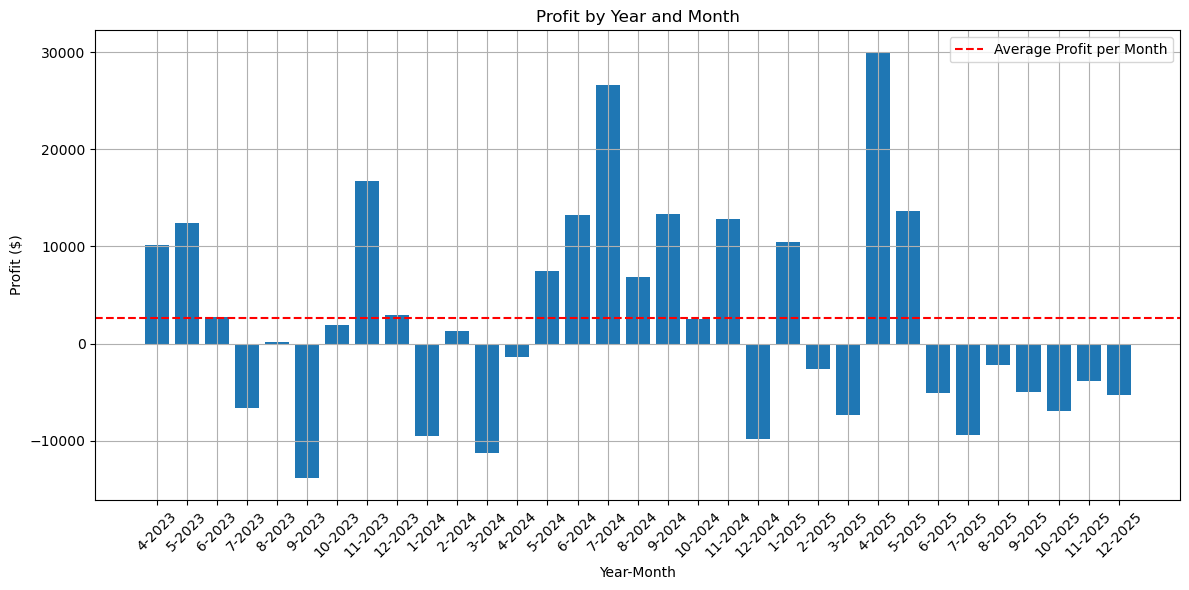

In [179]:
## Review the below chart

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.bar(df_dates_grouped['Month'].astype(str) + '-' + df_dates_grouped['Year'].astype(str), df_dates_grouped['Profitto_100'])
plt.axhline(y=average_profit_per_month_usd, color='r', linestyle='--', label='Average Profit per Month')
plt.title('Profit by Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Profit ($)')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [180]:
# group df_dates by Year and Month
df_dates_grouped_pct = df_dates.groupby(['Year', 'Month']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_dates_grouped_pct.columns = ['Year', 'Month', 'Profit_pct_100']

# display the first 10 rows of the grouped DataFrame
df_dates_grouped_pct.head(10)

,Year,Month,Profit_pct_100
0,2023,4,0.101505
1,2023,5,0.124349
2,2023,6,0.027570
3,2023,7,-0.066018
4,2023,8,0.001224
5,2023,9,-0.138849
6,2023,10,0.019059
7,2023,11,0.167723
8,2023,12,0.029593
9,2024,1,-0.095177


In [181]:
# average Profit_pct_100
average_profit_pct_per_month_pct = df_dates_grouped_pct['Profit_pct_100'].mean().round(2)
average_profit_pct_per_month_pct

np.float64(0.03)

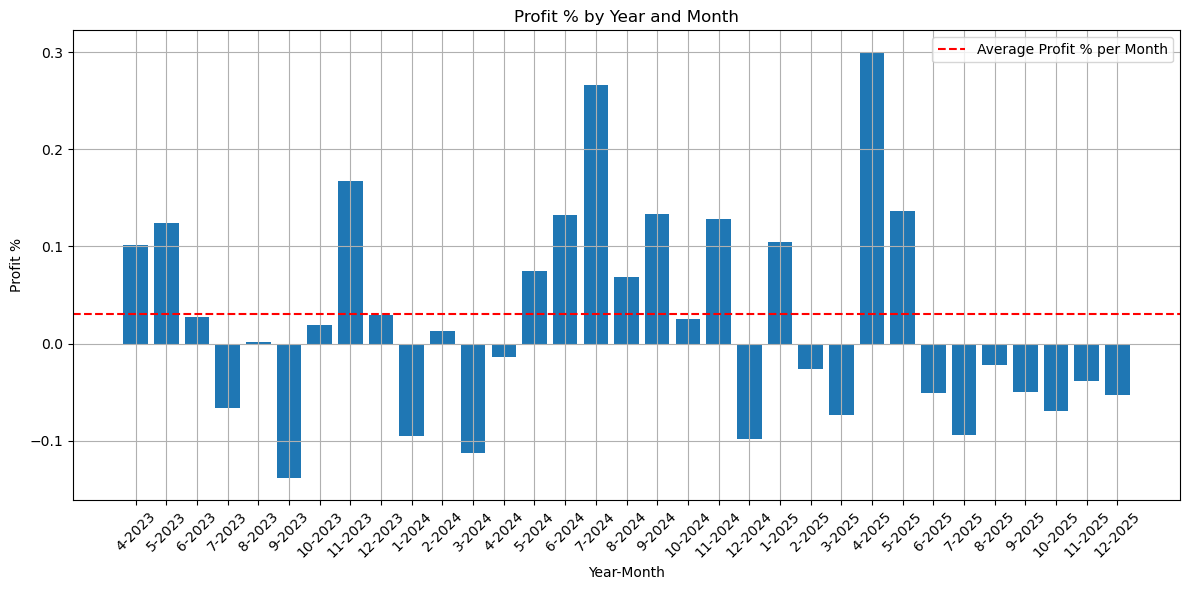

In [182]:
## Review the below chart

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.bar(df_dates_grouped_pct['Month'].astype(str) + '-' + df_dates_grouped_pct['Year'].astype(str), df_dates_grouped_pct['Profit_pct_100'])
plt.axhline(y=average_profit_pct_per_month_pct, color='r', linestyle='--', label='Average Profit % per Month')
plt.title('Profit % by Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Profit %')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [183]:
# average profit per month
avg_profit_100 = df_dates_grouped.groupby('Month')['Profitto_100'].mean().reset_index()

# rename columns
avg_profit_100.columns = ['Month', 'Avg_Profitto_100']

# display the first 10 rows of the grouped DataFrame
avg_profit_100.head(12)

,Month,Avg_Profitto_100
0,1,465.280000
1,2,-642.215000
2,3,-9294.670000
3,4,12936.566667
4,5,11184.281667
5,6,3606.605000
6,7,3555.773333
7,8,1593.378333
8,9,-1827.786667
9,10,-828.410000


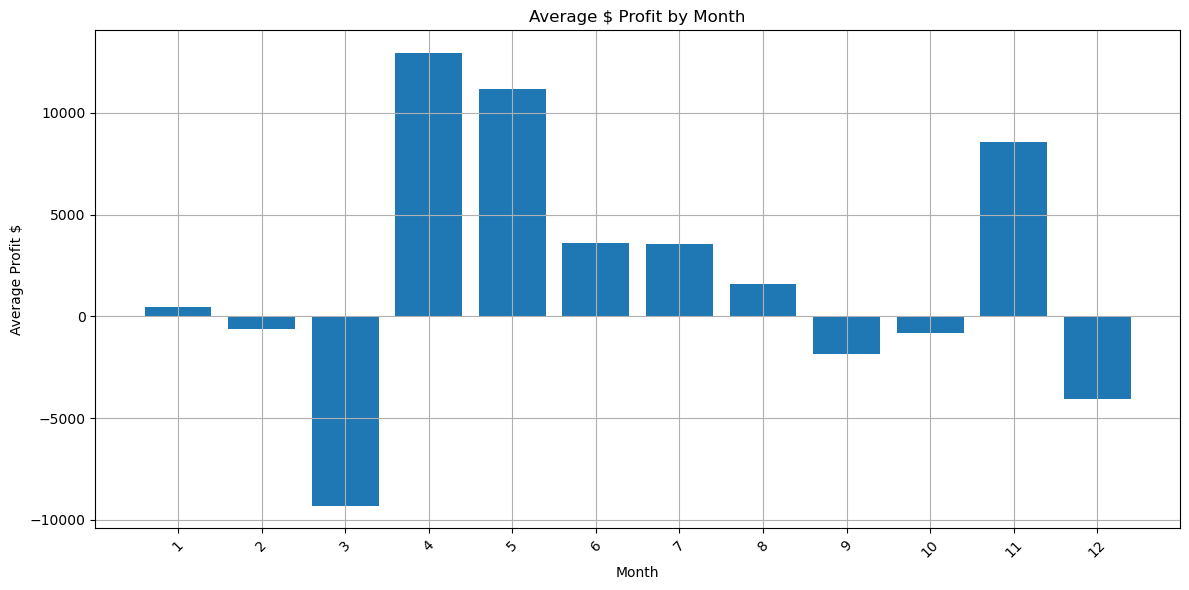

In [184]:
# bar plot avg_profit_100 
plt.figure(figsize=(12, 6))
plt.bar(avg_profit_100['Month'].astype(str), avg_profit_100['Avg_Profitto_100'])
plt.title('Average $ Profit by Month')
plt.xlabel('Month')
plt.ylabel('Average Profit $')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

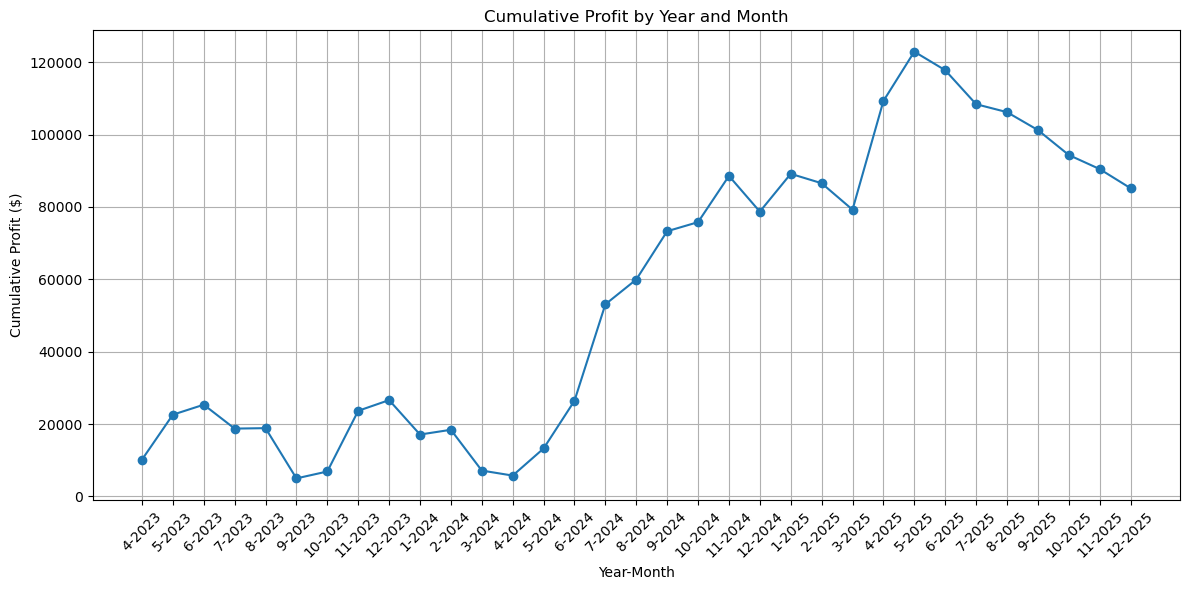

In [185]:
"""
This cell should remain unchanged because it's tracking absolute dollar profits, which are correctly summed. 
The compounding effect only applies to percentage returns, not dollar amounts being added together.
"""

# calculate cumulative profit by year and month
df_dates_grouped['Cumulative_Profit'] = df_dates_grouped['Profitto_100'].cumsum()

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_dates_grouped['Month'].astype(str) + '-' + df_dates_grouped['Year'].astype(str), df_dates_grouped['Cumulative_Profit'], marker='o')
plt.title('Cumulative Profit by Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Cumulative Profit ($)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

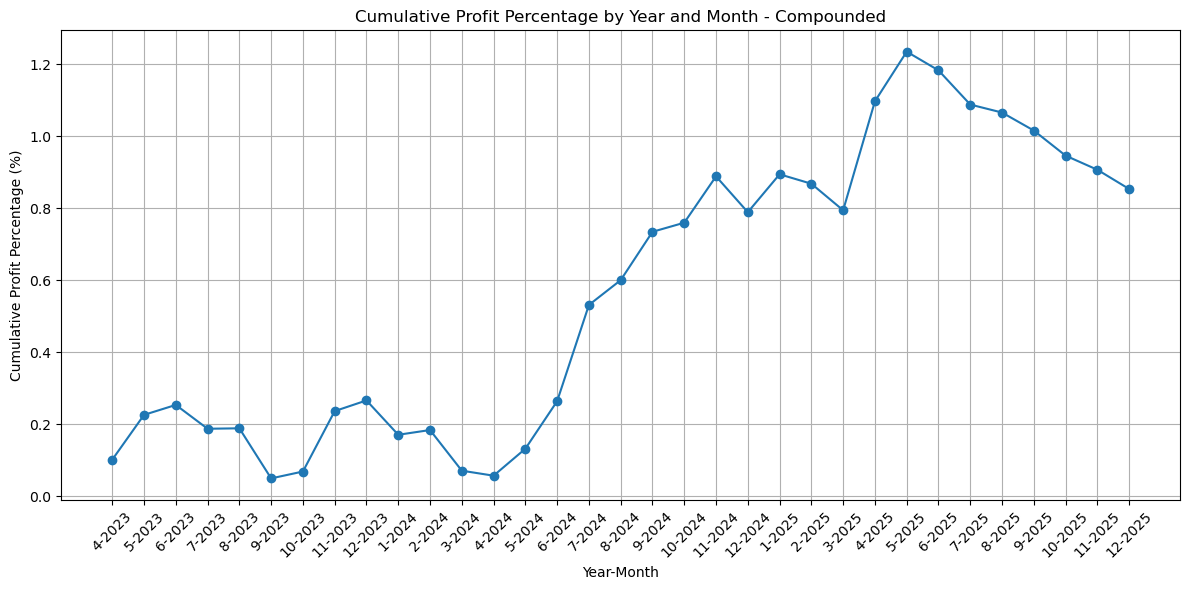

In [186]:
df_dates_grouped_pct = df_dates.copy()

# group df_dates_grouped_pct by Year and Month
df_dates_grouped_pct = df_dates_grouped_pct.groupby(['Year', 'Month']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_dates_grouped_pct.columns = ['Year', 'Month', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year and month with compounding
cum_profit_pct = ((1 + df_dates_grouped_pct['Profit_pct_100'] / 100).cumprod() - 1) * 100

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_dates_grouped_pct['Month'].astype(str) + '-' + df_dates_grouped_pct['Year'].astype(str), cum_profit_pct, marker='o')
plt.title('Cumulative Profit Percentage by Year and Month - Compounded')
plt.xlabel('Year-Month')
plt.ylabel('Cumulative Profit Percentage (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [187]:
# Group by Day for daily plot
df_dates_daily = df_dates.copy()

# group by Year, Month, and Day
df_dates_daily = df_dates_daily.groupby(['Year', 'Month', 'Day']).agg({
    'Profitto_100': 'sum',
    'Profit_pct_100': 'sum'
}).reset_index()

# Create a proper date column for better x-axis formatting
df_dates_daily['Date'] = pd.to_datetime(df_dates_daily[['Year', 'Month', 'Day']])

# Sort by date
df_dates_daily = df_dates_daily.sort_values('Date')

# Calculate cumulative profit percentage with compounding
df_dates_daily['Cumulative_Profit_pct'] = ((1 + df_dates_daily['Profit_pct_100'] / 100).cumprod() - 1) * 100

# Calculate cumulative dollar profit
df_dates_daily['Cumulative_Profit_USD'] = df_dates_daily['Profitto_100'].cumsum()

# Display first rows
df_dates_daily.head(10)

,Year,Month,Day,Profitto_100,Profit_pct_100,Date,Cumulative_Profit_pct,Cumulative_Profit_USD
0,2023,4,17,5309.525,0.053095,2023-04-17,0.053095,5309.525
1,2023,4,18,-45.975,-0.000460,2023-04-18,0.052635,5263.550
2,2023,4,19,-554.475,-0.005545,2023-04-19,0.047088,4709.075
3,2023,4,20,-67.050,-0.000670,2023-04-20,0.046417,4642.025
4,2023,4,21,450.600,0.004506,2023-04-21,0.050925,5092.625
5,2023,4,24,-846.375,-0.008464,2023-04-24,0.042457,4246.250
6,2023,4,26,5888.175,0.058882,2023-04-26,0.101364,10134.425
7,2023,4,28,16.075,0.000161,2023-04-28,0.101524,10150.500
8,2023,5,1,-139.425,-0.001394,2023-05-01,0.100129,10011.075
9,2023,5,2,-452.850,-0.004528,2023-05-02,0.095596,9558.225


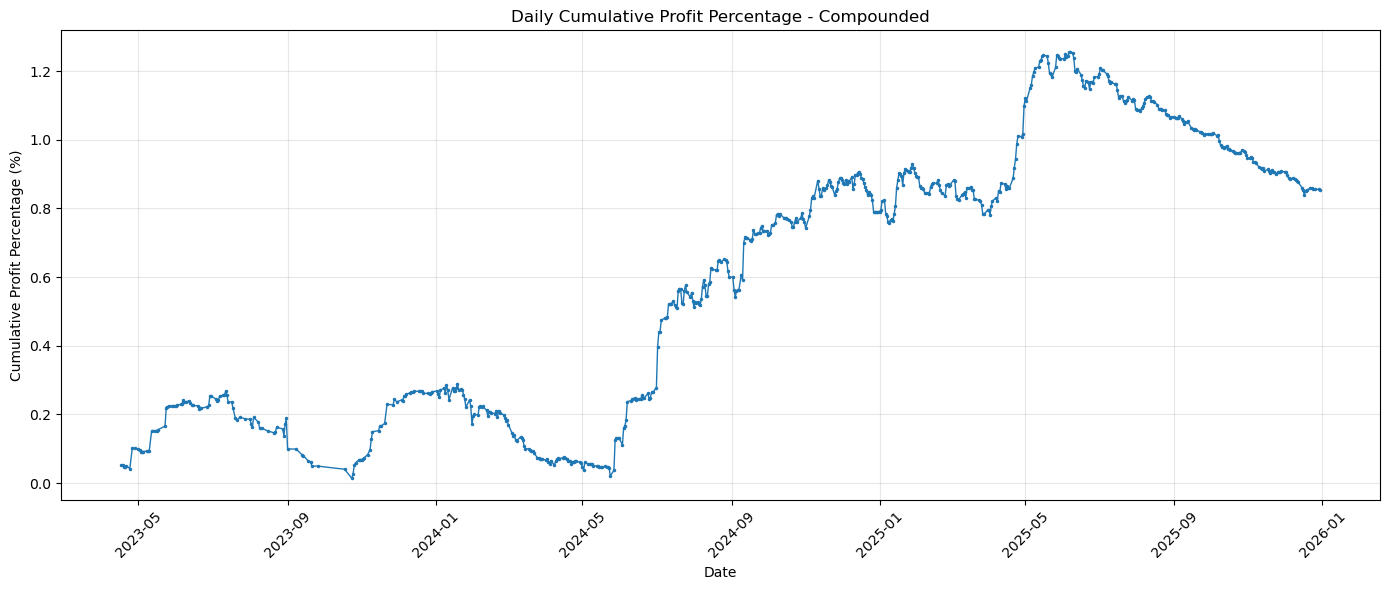

In [188]:
# Plot daily cumulative profit percentage
plt.figure(figsize=(14, 6))
plt.plot(df_dates_daily['Date'], df_dates_daily['Cumulative_Profit_pct'], marker='.', markersize=3, linewidth=1)
plt.title('Daily Cumulative Profit Percentage - Compounded')
plt.xlabel('Date')
plt.ylabel('Cumulative Profit Percentage (%)')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

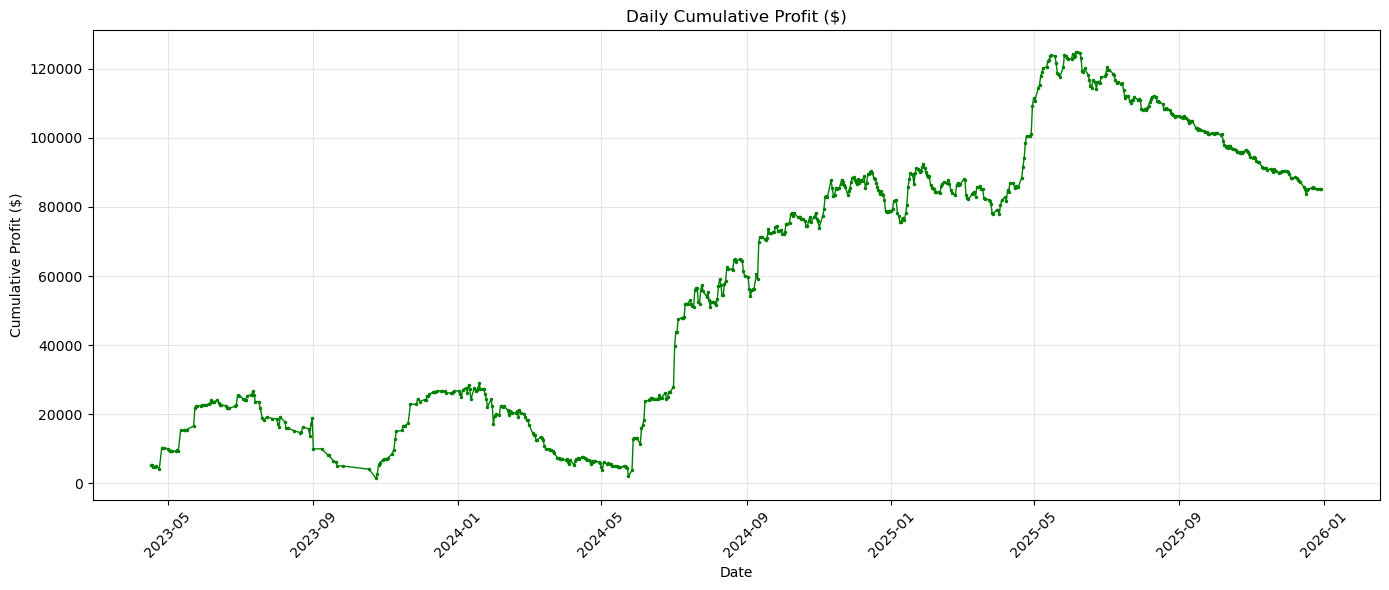

In [189]:
# Plot daily cumulative profit in USD
plt.figure(figsize=(14, 6))
plt.plot(df_dates_daily['Date'], df_dates_daily['Cumulative_Profit_USD'], marker='.', markersize=3, linewidth=1, color='green')
plt.title('Daily Cumulative Profit ($)')
plt.xlabel('Date')
plt.ylabel('Cumulative Profit ($)')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

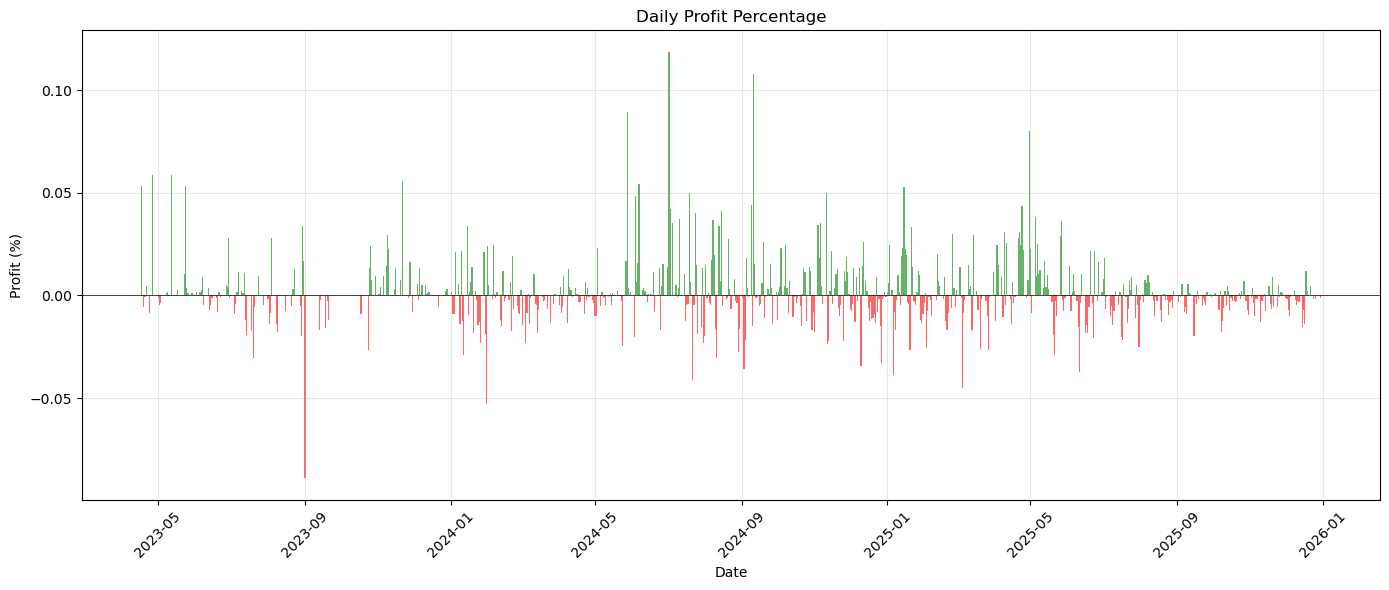

In [190]:
# Plot daily profit percentage distribution
plt.figure(figsize=(14, 6))
colors = ['green' if x >= 0 else 'red' for x in df_dates_daily['Profit_pct_100']]
plt.bar(df_dates_daily['Date'], df_dates_daily['Profit_pct_100'], color=colors, alpha=0.6, width=1)
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.title('Daily Profit Percentage')
plt.xlabel('Date')
plt.ylabel('Profit (%)')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [191]:
# calculate the average profit percentage for each symbol
avg_profit_pct = df.groupby('Simbolo')['Profit_pct'].mean().sort_values(ascending=False).round(2)   

# Convert the result to a DataFrame
avg_profit_pct = avg_profit_pct.reset_index()

# Rename the columns
avg_profit_pct.columns = ['Simbolo', 'Average_Profit_Percentage']

# Display the result
avg_profit_pct.sort_values(by='Average_Profit_Percentage', ascending=False).head(10)

,Simbolo,Average_Profit_Percentage
0,XAGUSD,6.88
1,LVMH,0.27
2,AUDCAD,0.05
3,META,0.05
4,AAPL,0.04
5,NVDA,0.04
6,DOGUSD,0.03
7,US30,0.03
8,US100,0.03
9,GER40,0.02


In [192]:
# check again

# average profit pct per month
avg_profit_100_pct = df_100.groupby('Month')['Profit_pct_100'].mean().reset_index()

# rename columns
avg_profit_100_pct.columns = ['Month', 'Avg_Profit_pct_100']

# display the first 10 rows of the grouped DataFrame
avg_profit_100_pct.head(12)

,Month,Avg_Profit_pct_100
0,1,0.000005
1,2,-0.000012
2,3,-0.000139
3,4,0.000298
4,5,0.000304
5,6,0.000105
6,7,0.000088
7,8,0.000055
8,9,-0.000078
9,10,-0.000026


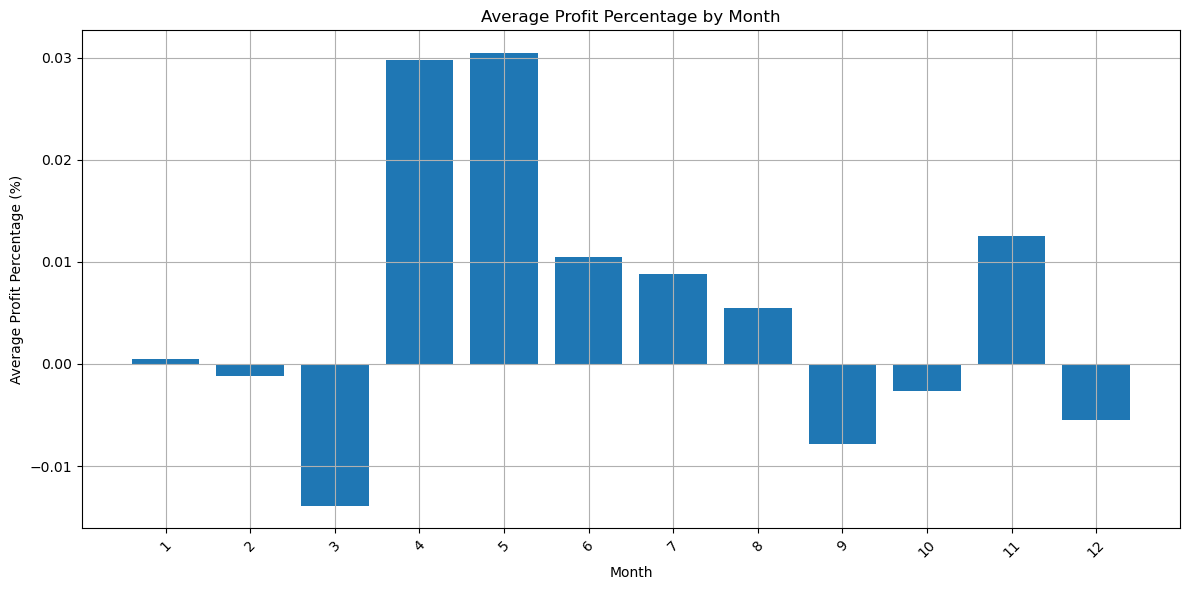

In [193]:
# bar plot avg_profit_100_pct
plt.figure(figsize=(12, 6))
plt.bar(avg_profit_100_pct['Month'].astype(str), avg_profit_100_pct['Avg_Profit_pct_100']*100)
plt.title('Average Profit Percentage by Month')
plt.xlabel('Month')
plt.ylabel('Average Profit Percentage (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [194]:
funded = df_100.copy()

In [195]:
df_3_months = df_100.copy()

from datetime import datetime, timedelta

# Get the current date
today = datetime.now()

# Calculate the date 3 months ago
three_months_ago = today - timedelta(days=90)

# filter the dataframe for the last 3 months
df_3_months_filtered = df_3_months.loc[
    (pd.to_datetime(df_3_months['Year'].astype(str) + '-' + df_3_months['Month'].astype(str) + '-01') >= three_months_ago) &
    (pd.to_datetime(df_3_months['Year'].astype(str) + '-' + df_3_months['Month'].astype(str) + '-01') <= today)
]

In [196]:
# from df_3_months_filtered calculate best and worst symbols
best_simbol_3_months = df_3_months_filtered.groupby('Simbolo')['Profitto_100'].sum().sort_values(ascending=False).round(2)

# Convert the result to a DataFrame
best_simbol_3_months = best_simbol_3_months.reset_index()

# Rename the columns
best_simbol_3_months.columns = ['Symbol', '3_Months_Gain']

# Display the result
best_simbol_3_months.sort_values(by='3_Months_Gain', ascending=False).head(10)
best_simbol_3_months

,Symbol,3_Months_Gain
0,AAPL,868.82
1,SPN35,743.66
2,ETHUSD,416.40
3,GER40,227.81
4,LVMH,187.68
5,JP225,166.92
6,META,114.20
7,BTCUSD,74.26
8,USDCAD,24.43
9,JPN225,-3.75


In [197]:
# worst symbols
worst_simbol_3_months = best_simbol_3_months.sort_values(by='3_Months_Gain', ascending=True).head(10)

# rename columns
worst_simbol_3_months.columns = ['Symbol', '3_Months_Loss']

worst_simbol_3_months

,Symbol,3_Months_Loss
29,US100,-4546.96
28,US500,-2262.39
27,XAUUSD,-1134.98
26,TSLA,-864.90
25,BABA,-547.86
24,RACE,-541.61
23,BNBUSD,-457.74
22,NVDA,-370.66
21,MSFT,-294.06
20,US30,-261.90


In [198]:
# from df_3_months_filtered calculate best and worst symbols for the last 1 month
one_month_ago = today - timedelta(days=30)

# filter for last 1 month
df_1_month_filtered = df_3_months_filtered.loc[
    pd.to_datetime(df_3_months_filtered['Year'].astype(str) + '-' + df_3_months_filtered['Month'].astype(str) + '-' + df_3_months_filtered['Day'].astype(str)) >= one_month_ago
]

best_simbol_1_months = df_1_month_filtered.groupby('Simbolo')['Profitto_100'].sum().sort_values(ascending=False).round(2)

# Convert the result to a DataFrame
best_simbol_1_months = best_simbol_1_months.reset_index()

# Rename the columns
best_simbol_1_months.columns = ['Symbol', '1_Month_Gain']

# Display the result
best_simbol_1_months.sort_values(by='1_Month_Gain', ascending=False).head(10)
best_simbol_1_months.head(10)

,Symbol,1_Month_Gain
0,SPN35,743.66
1,BTCUSD,551.44
2,GER40,210.98
3,LVMH,187.68
4,JP225,155.71
5,META,114.20
6,MSFT,79.62
7,RACE,35.16
8,T,-7.92
9,DBKGn,-15.00


In [199]:
# worst symbols for the last 1 month
worst_simbol_1_months = best_simbol_1_months.sort_values(by='1_Month_Gain', ascending=True).head(10)

# rename columns
worst_simbol_1_months.columns = ['Symbol', '1_Month_Loss']
worst_simbol_1_months

,Symbol,1_Month_Loss
23,US100,-3111.43
22,US500,-2106.95
21,TSLA,-864.90
20,AAPL,-221.72
19,US30,-162.56
18,ZM,-120.66
17,BABA,-105.12
16,AMZN,-104.26
15,ALVG,-100.32
14,VOWG_p,-41.98


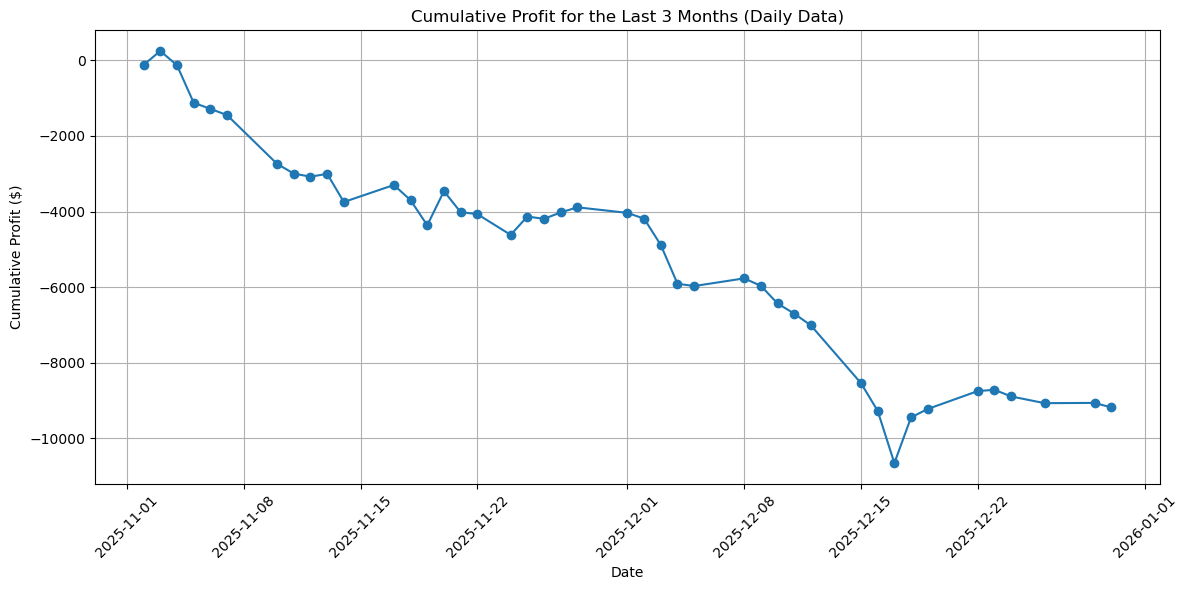

In [200]:
# Raggruppa per Year, Month e Day e calcola la somma dei profitti
df_3_months_filtered_cumsum = df_3_months_filtered.groupby(['Year', 'Month', 'Day']).agg({'Profitto_100': 'sum'}).reset_index()

# Ordina per data (opzionale, ma utile per il plot)
df_3_months_filtered_cumsum = df_3_months_filtered_cumsum.sort_values(['Year', 'Month', 'Day'])

# Crea una colonna data per l'asse x
df_3_months_filtered_cumsum['Date'] = pd.to_datetime(df_3_months_filtered_cumsum[['Year', 'Month', 'Day']])

# Plot del grafico aggiornato
plt.figure(figsize=(12, 6))
plt.plot(df_3_months_filtered_cumsum['Date'], df_3_months_filtered_cumsum['Profitto_100'].cumsum(), marker='o')
plt.title('Cumulative Profit for the Last 3 Months (Daily Data)')
plt.xlabel('Date')
plt.ylabel('Cumulative Profit ($)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

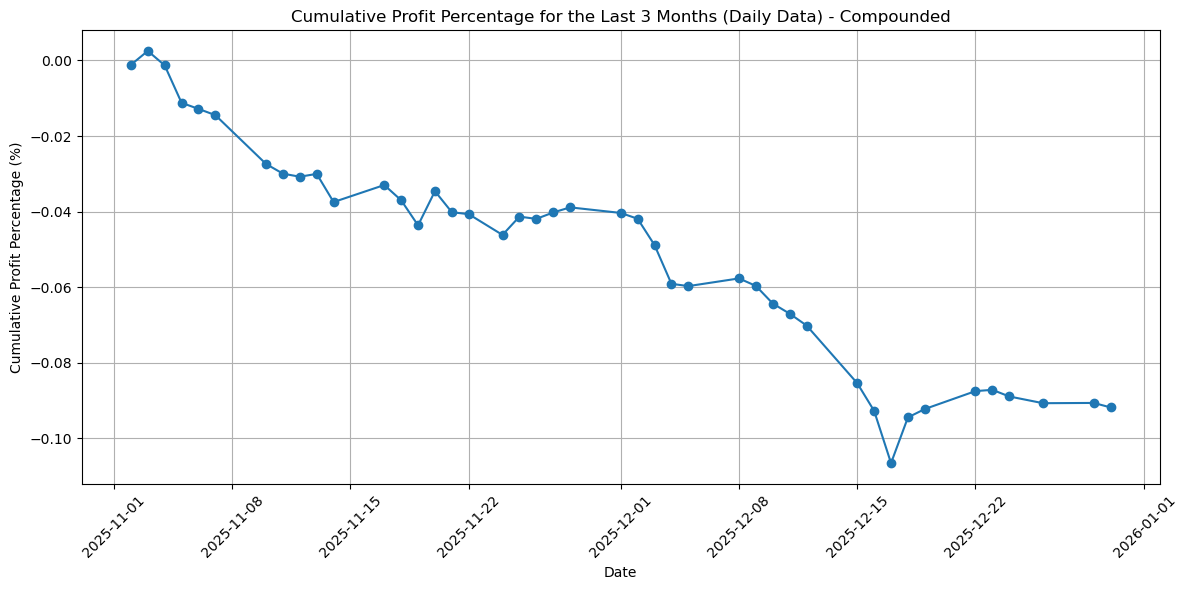

In [201]:
# Raggruppa per Month, Year e Day e calcola la somma dei profitti percentuali
df_3_months_filtered_cumsum_pct = df_3_months_filtered.groupby(['Month', 'Year', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()

# Ordina per data (utile per il plot)
df_3_months_filtered_cumsum_pct = df_3_months_filtered_cumsum_pct.sort_values(['Year', 'Month', 'Day'])

# Crea una colonna data per l'asse x
df_3_months_filtered_cumsum_pct['Date'] = pd.to_datetime(df_3_months_filtered_cumsum_pct[['Year', 'Month', 'Day']])

# Calculate compounded returns: (1 + r1) * (1 + r2) * ... - 1
df_3_months_filtered_cumsum_pct['Cumulative_Return_Compounded'] = (1 + df_3_months_filtered_cumsum_pct['Profit_pct_100'] / 100).cumprod() - 1

# Plot del grafico aggiornato
plt.figure(figsize=(12, 6))
plt.plot(df_3_months_filtered_cumsum_pct['Date'], df_3_months_filtered_cumsum_pct['Cumulative_Return_Compounded'] * 100, marker='o')
plt.title('Cumulative Profit Percentage for the Last 3 Months (Daily Data) - Compounded')
plt.xlabel('Date')
plt.ylabel('Cumulative Profit Percentage (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

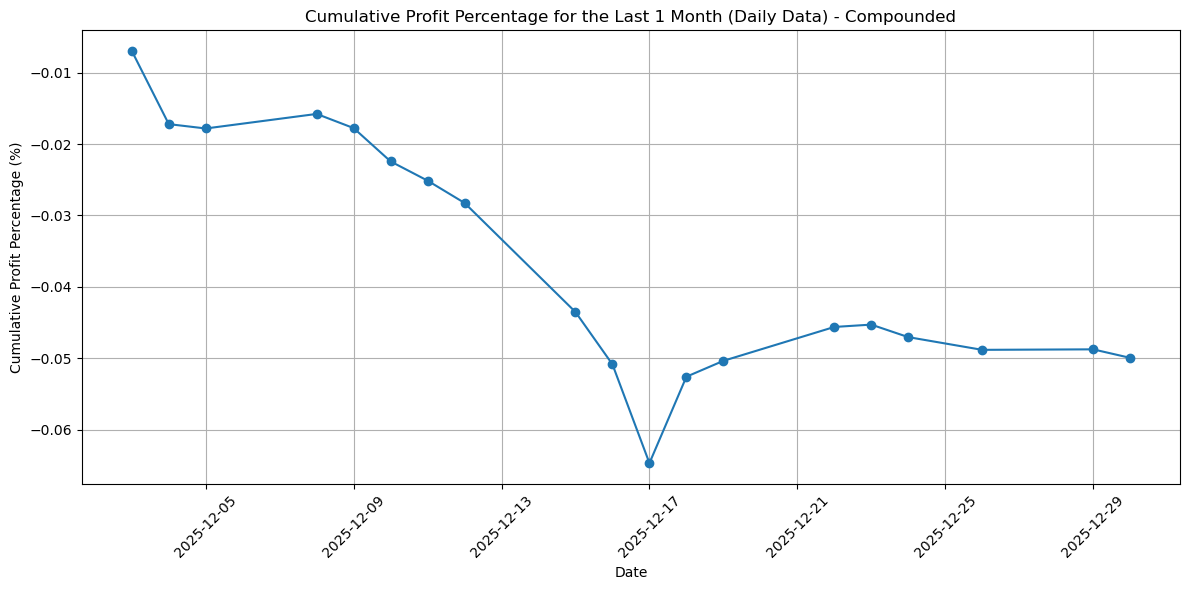

In [202]:
# Calculate df_1_months_filtered_cumsum_pct
# Raggruppa per Month, Year e Day e calcola la somma dei profitti percentuali
df_1_months_filtered_cumsum_pct = df_1_month_filtered.groupby(['Month', 'Year', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()

# Ordina per data (utile per il plot)
df_1_months_filtered_cumsum_pct = df_1_months_filtered_cumsum_pct.sort_values(['Year', 'Month', 'Day'])

# Crea una colonna data per l'asse x
df_1_months_filtered_cumsum_pct['Date'] = pd.to_datetime(df_1_months_filtered_cumsum_pct[['Year', 'Month', 'Day']])

# Calculate compounded returns: (1 + r1) * (1 + r2) * ... - 1
df_1_months_filtered_cumsum_pct['Cumulative_Return_Compounded'] = (1 + df_1_months_filtered_cumsum_pct['Profit_pct_100'] / 100).cumprod() - 1

# Plot del grafico aggiornato
plt.figure(figsize=(12, 6))
plt.plot(df_1_months_filtered_cumsum_pct['Date'], df_1_months_filtered_cumsum_pct['Cumulative_Return_Compounded'] * 100, marker='o')
plt.title('Cumulative Profit Percentage for the Last 1 Month (Daily Data) - Compounded')
plt.xlabel('Date')
plt.ylabel('Cumulative Profit Percentage (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [203]:
# win rate calculation for df_100

# Calculate the number of winning trades
winning_trades = df_100[df_100['Profitto_100'] > 0].shape[0]

# Calculate the total number of trades
total_trades = df_100.shape[0]

# Calculate the win rate
win_rate = (winning_trades / total_trades) * 100 if total_trades > 0 else 0

# Display the win rate
print(f"Win Rate: {win_rate:.2f}%")

Win Rate: 49.91%


In [204]:
# win rate calculation for df_3_months_filtered

# Calculate the number of winning trades for the last 3 months
winning_trades_3_months = df_3_months_filtered[df_3_months_filtered['Profitto_100'] > 0].shape[0]

# Calculate the total number of trades for the last 3 months
total_trades_3_months = df_3_months_filtered.shape[0]

# Calculate the win rate for the last 3 months
win_rate_3_months = (winning_trades_3_months / total_trades_3_months) * 100 if total_trades_3_months > 0 else 0

# Display the win rate for the last 3 months
print(f"Win Rate for the Last 3 Months: {win_rate_3_months:.2f}%")

Win Rate for the Last 3 Months: 33.93%


In [205]:
# count total number of trades for the whole dataset
total_trades_all = df_100.shape[0]

# Display the total number of trades
print(f"Total Number of Trades: {total_trades_all}")

Total Number of Trades: 15774


In [206]:
# Number of trades per day
trades_per_day = df_100.groupby(['Year', 'Month', 'Day']).size().reset_index(name='Trades_Count')

# Display the first few rows of trades_per_day
trades_per_day.head(10)

,Year,Month,Day,Trades_Count
0,2023,4,17,9
1,2023,4,18,5
2,2023,4,19,5
3,2023,4,20,3
4,2023,4,21,5
5,2023,4,24,2
6,2023,4,26,4
7,2023,4,28,5
8,2023,5,1,5
9,2023,5,2,5


In [207]:
# average number of trades per day
avg_trades_per_day = trades_per_day['Trades_Count'].mean()

# Display the average number of trades per day
print(f"Average Number of Trades per Day from April 2023: {avg_trades_per_day:.2f}")

Average Number of Trades per Day from April 2023: 22.76


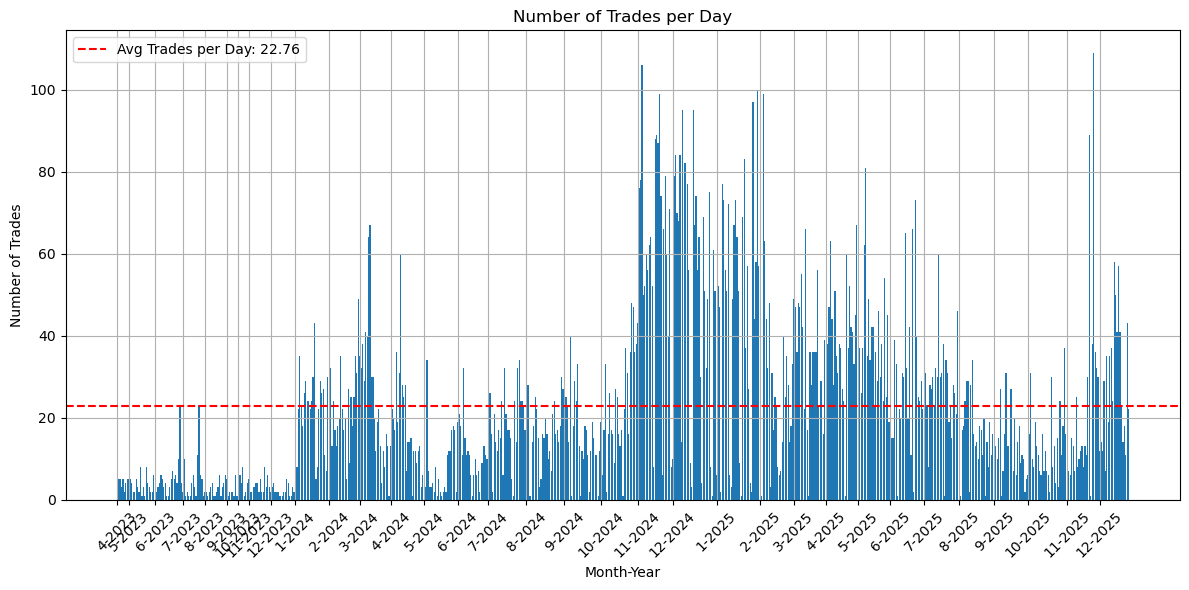

In [208]:
# trades_per_day plot with bar chart, with avg_trades_per_day horizontal line
plt.figure(figsize=(12, 6))
plt.bar(trades_per_day.index, trades_per_day['Trades_Count'])

# Days grouped by Month and Year for x-axis labels
month_year = trades_per_day['Month'].astype(str) + '-' + trades_per_day['Year'].astype(str)
_, tick_positions = np.unique(month_year, return_index=True)
tick_labels = month_year.iloc[tick_positions].values

plt.axhline(y=avg_trades_per_day, color='r', linestyle='--', label=f'Avg Trades per Day: {avg_trades_per_day:.2f}')
plt.title('Number of Trades per Day')
plt.xlabel('Month-Year')
plt.ylabel('Number of Trades')
plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


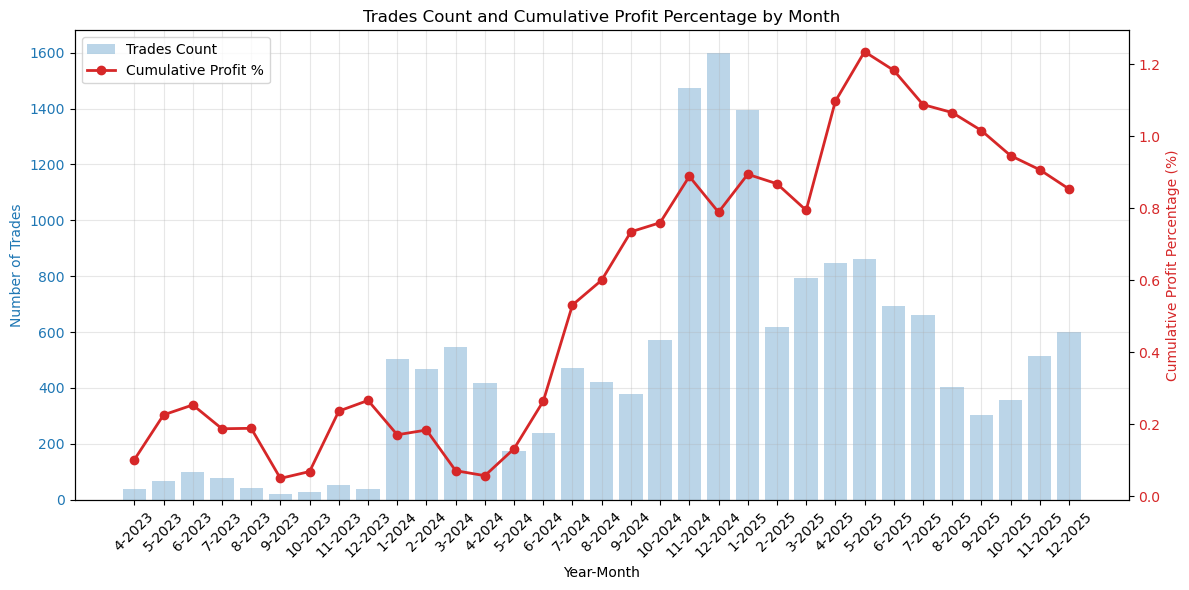

In [209]:
# Prepare data for cumulative profit percentage
df_dates_grouped_pct = df_dates.copy()
df_dates_grouped_pct = df_dates_grouped_pct.groupby(['Year', 'Month']).agg({'Profit_pct_100': 'sum'}).reset_index()
df_dates_grouped_pct.columns = ['Year', 'Month', 'Profit_pct_100']

# Calculate cumulative Profit_pct_100 by year and month with compounding
cum_profit_pct = ((1 + df_dates_grouped_pct['Profit_pct_100'] / 100).cumprod() - 1) * 100

# Create x-axis labels
x_labels = df_dates_grouped_pct['Month'].astype(str) + '-' + df_dates_grouped_pct['Year'].astype(str)

# Prepare data for trades per month
trades_per_month = df_dates.groupby(['Year', 'Month']).size().reset_index(name='Trades_Count')

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot bar chart for trades count on primary axis
color = 'tab:blue'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Number of Trades', color=color)
ax1.bar(x_labels, trades_per_month['Trades_Count'], alpha=0.3, color=color, label='Trades Count')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Create secondary axis for cumulative profit percentage
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Cumulative Profit Percentage (%)', color=color)
ax2.plot(x_labels, cum_profit_pct, marker='o', color=color, linewidth=2, label='Cumulative Profit %')
ax2.tick_params(axis='y', labelcolor=color)

# Add title and grid
plt.title('Trades Count and Cumulative Profit Percentage by Month')
ax1.grid(alpha=0.3)

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

In [210]:
# Create filtered data_tv_tv_tvframes for each symbol/asset
df_nq_100 = df_100[df_100['Simbolo'] == 'US100'].copy()
df_spx_100 = df_100[df_100['Simbolo'] == 'US500'].copy()
df_us30_100 = df_100[df_100['Simbolo'] == 'US30'].copy()
df_stocks_100 = df_100[df_100['Asset'] == 'Stocks'].copy()

# add dfs
df_crypto_100 = df_100[df_100['Asset'] == 'Crypto'].copy()
df_forex_100 = df_100[df_100['Asset'] == 'Forex'].copy()
df_commodities_100 = df_100[df_100['Asset'] == 'Commodities'].copy()

In [211]:
# df_nq group by Year, Month and day columns
df_nq_grouped = df_nq_100.groupby(['Year', 'Month', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_nq_grouped.columns = ['Year', 'Month', 'Day', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_nq_grouped['Cumulative_Profit'] = np.log(1 + df_nq_grouped['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

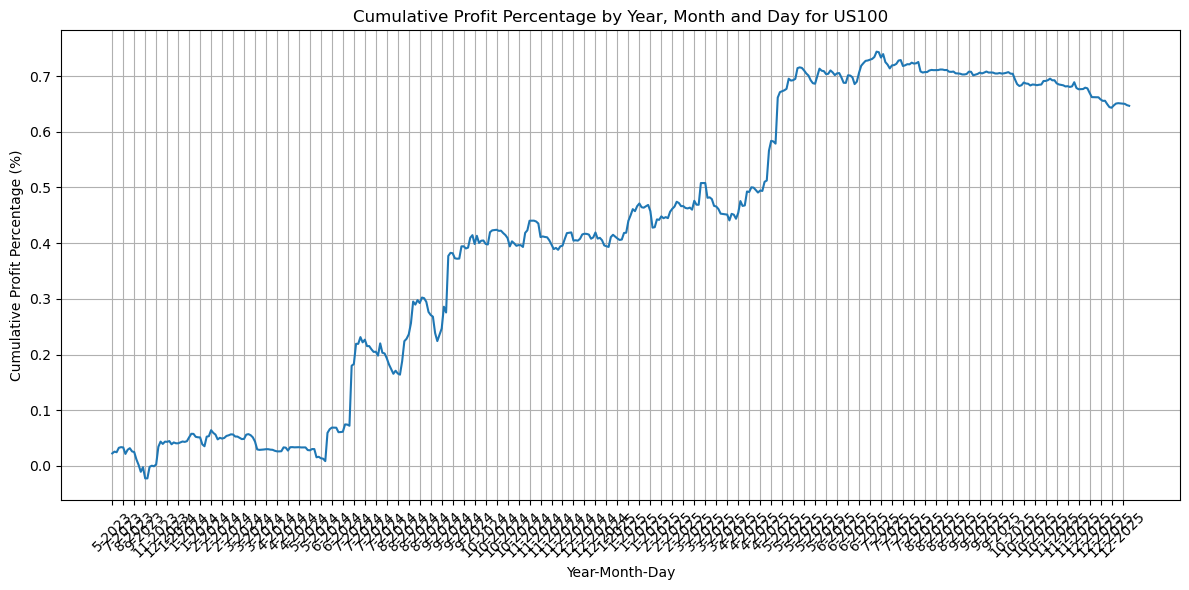

In [212]:
# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_nq_grouped['Day'].astype(str) + '-' + df_nq_grouped['Month'].astype(str) + '-' + df_nq_grouped['Year'].astype(str), df_nq_grouped['Cumulative_Profit']*100)
plt.title('Cumulative Profit Percentage by Year, Month and Day for US100')
plt.xlabel('Year-Month-Day')
plt.ylabel('Cumulative Profit Percentage (%)')
plt.xticks(
	ticks=range(0, len(df_nq_grouped), 5),
	labels=(df_nq_grouped['Month'].astype(str) + '-' + df_nq_grouped['Year'].astype(str))[::5],
	rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


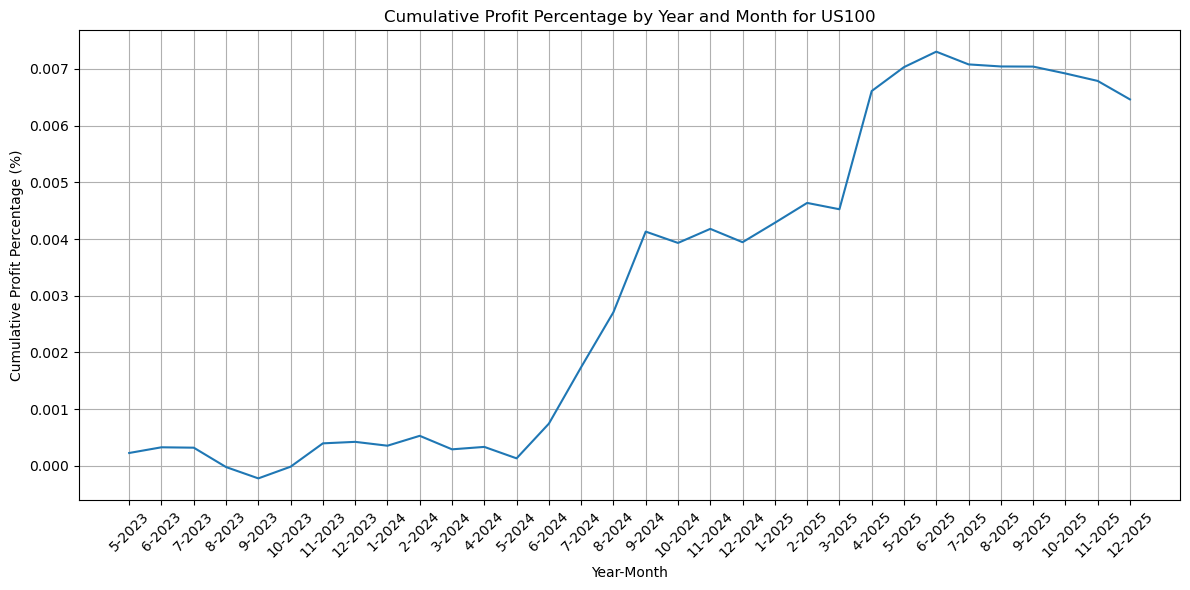

In [213]:
# df_nq group by Year, Month
df_nq_grouped_month_year = df_nq_100.groupby(['Year', 'Month']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_nq_grouped_month_year.columns = ['Year', 'Month', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year, month using log returns
df_nq_grouped_month_year['Cumulative_Profit'] = np.log(1 + df_nq_grouped_month_year['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_nq_grouped_month_year['Month'].astype(str) + '-' + df_nq_grouped_month_year['Year'].astype(str), df_nq_grouped_month_year['Cumulative_Profit'])
plt.title('Cumulative Profit Percentage by Year and Month for US100')
plt.xlabel('Year-Month')
plt.ylabel('Cumulative Profit Percentage (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


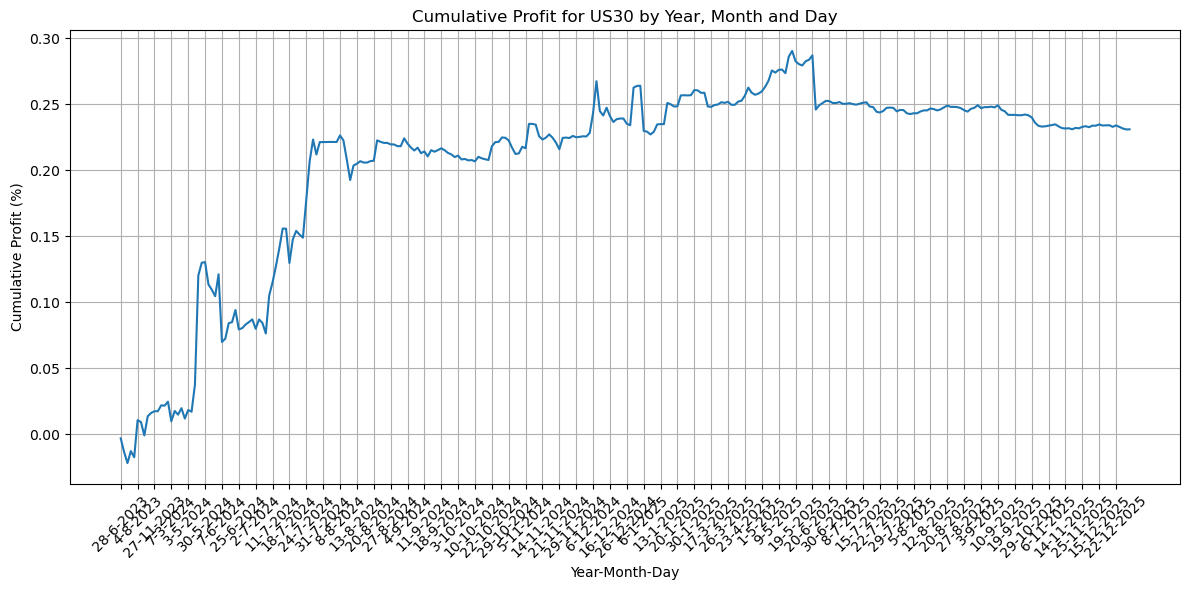

In [214]:
# df_us30 group by Year, Month and day columns
df_us30_grouped = df_us30_100.groupby(['Year', 'Month', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_us30_grouped.columns = ['Year', 'Month', 'Day', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_us30_grouped['Cumulative_Profit'] = np.log(1 + df_us30_grouped['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_us30_grouped['Day'].astype(str) + '-' + df_us30_grouped['Month'].astype(str) + '-' + df_us30_grouped['Year'].astype(str), df_us30_grouped['Cumulative_Profit']*100)
plt.title('Cumulative Profit for US30 by Year, Month and Day')
plt.xlabel('Year-Month-Day')
plt.ylabel('Cumulative Profit (%)')
plt.xticks(
	ticks=range(0, len(df_us30_grouped), 5),
	labels=(df_us30_grouped['Day'].astype(str) + '-' + df_us30_grouped['Month'].astype(str) + '-' + df_us30_grouped['Year'].astype(str))[::5],
	rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

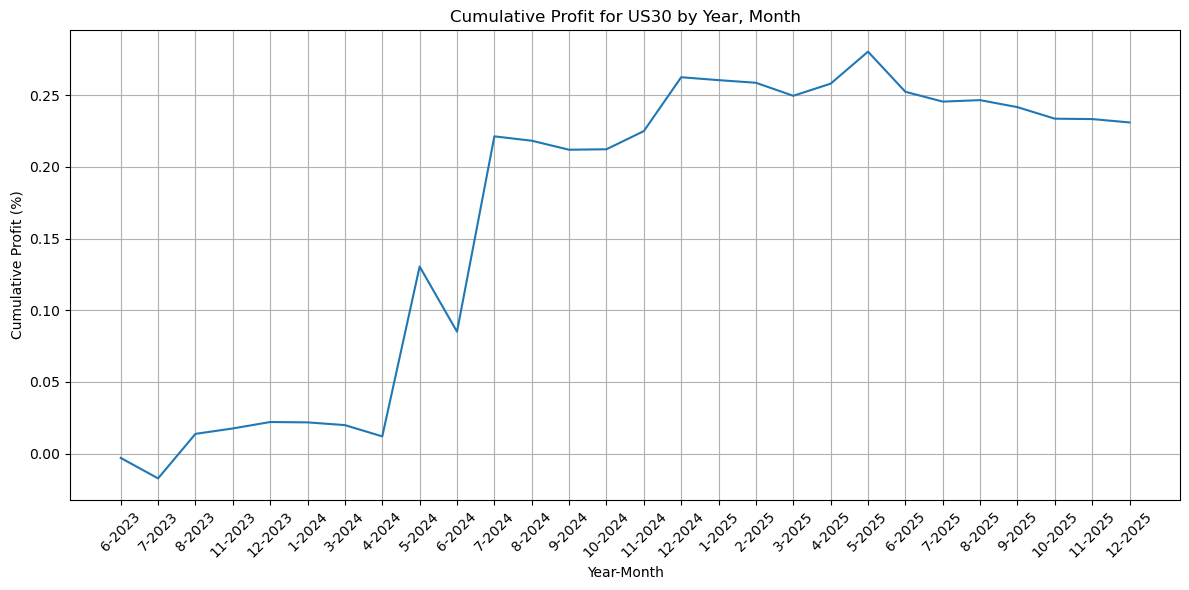

In [215]:
# df_us30 group by Year, Month
df_us30_grouped_month_year = df_us30_100.groupby(['Year', 'Month']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_us30_grouped_month_year.columns = ['Year', 'Month', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_us30_grouped_month_year['Cumulative_Profit'] = np.log(1 + df_us30_grouped_month_year['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_us30_grouped_month_year['Month'].astype(str) + '-' + df_us30_grouped_month_year['Year'].astype(str), df_us30_grouped_month_year['Cumulative_Profit']*100)
plt.title('Cumulative Profit for US30 by Year, Month')
plt.xlabel('Year-Month')
plt.ylabel('Cumulative Profit (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

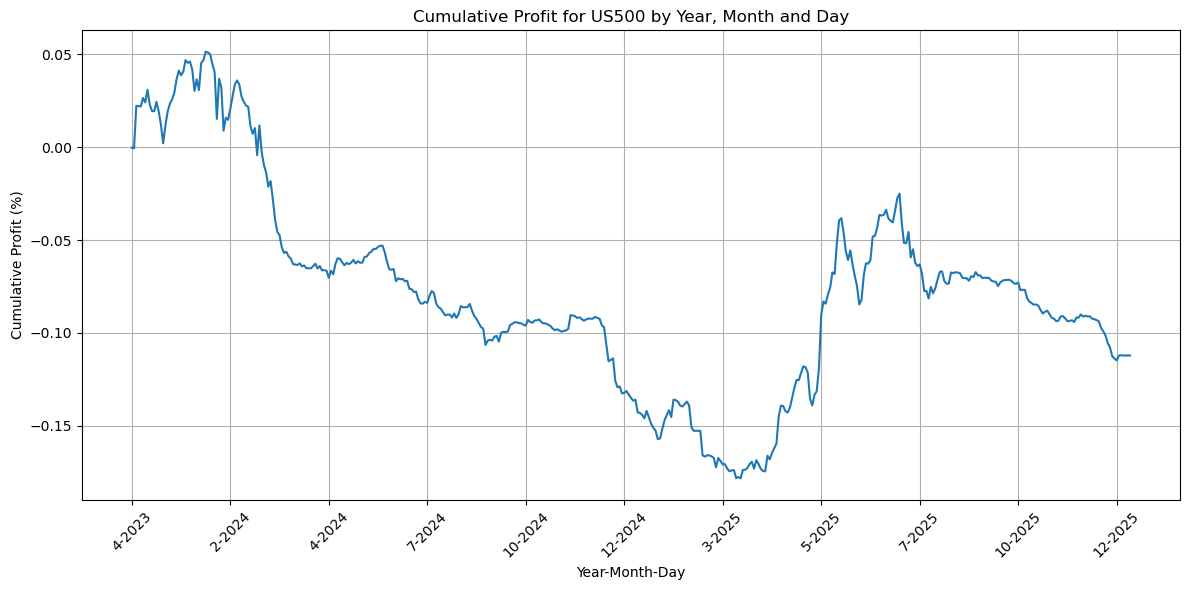

In [216]:
# df_spx group by Year, Month and day columns
df_spx_grouped = df_spx_100.groupby(['Year', 'Month', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_spx_grouped.columns = ['Year', 'Month', 'Day', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_spx_grouped['Cumulative_Profit'] = np.log(1 + df_spx_grouped['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_spx_grouped['Day'].astype(str) + '-' + df_spx_grouped['Month'].astype(str) + '-' + df_spx_grouped['Year'].astype(str), df_spx_grouped['Cumulative_Profit']*100)
plt.title('Cumulative Profit for US500 by Year, Month and Day')
plt.xlabel('Year-Month-Day')
plt.ylabel('Cumulative Profit (%)')
plt.xticks(ticks=range(0, len(df_spx_grouped), max(1, len(df_spx_grouped)//10)), 
           labels=(df_spx_grouped['Month'].astype(str) + '-' + df_spx_grouped['Year'].astype(str))[::max(1, len(df_spx_grouped)//10)],
           rotation=45)           
plt.grid()
plt.tight_layout()
plt.show()

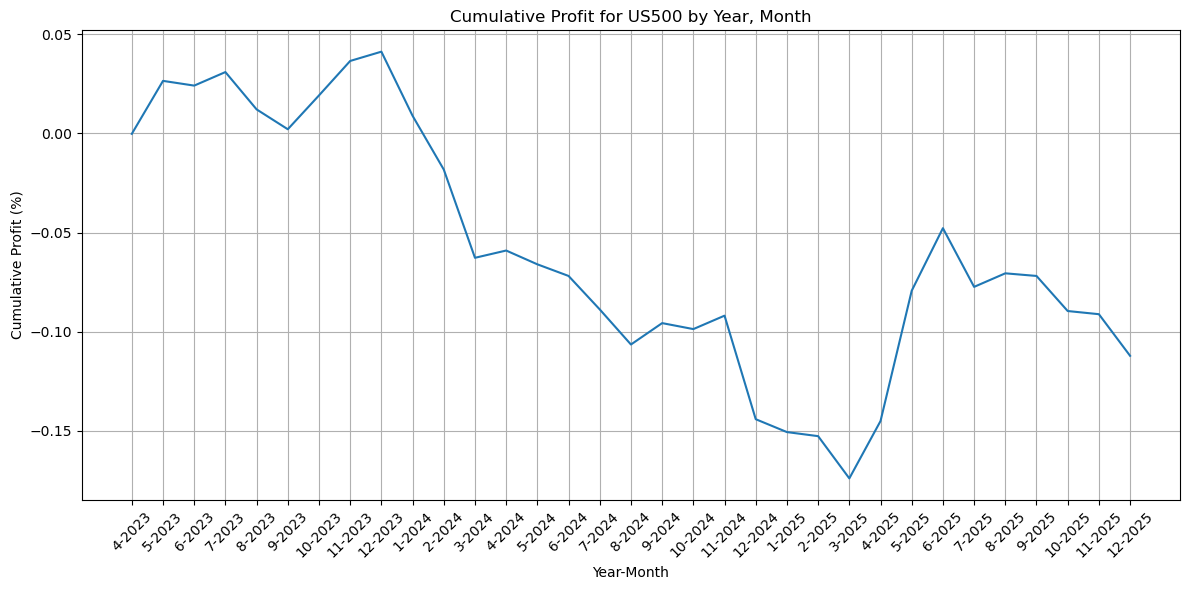

In [217]:
# df_spx group by Year, Month
df_spx_grouped_month_year = df_spx_100.groupby(['Year', 'Month']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_spx_grouped_month_year.columns = ['Year', 'Month', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_spx_grouped_month_year['Cumulative_Profit'] = np.log(1 + df_spx_grouped_month_year['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_spx_grouped_month_year['Month'].astype(str) + '-' + df_spx_grouped_month_year['Year'].astype(str), df_spx_grouped_month_year['Cumulative_Profit']*100)
plt.title('Cumulative Profit for US500 by Year, Month')
plt.xlabel('Year-Month')
plt.ylabel('Cumulative Profit (%)')
plt.xticks(rotation=45)           
plt.grid()
plt.tight_layout()
plt.show()

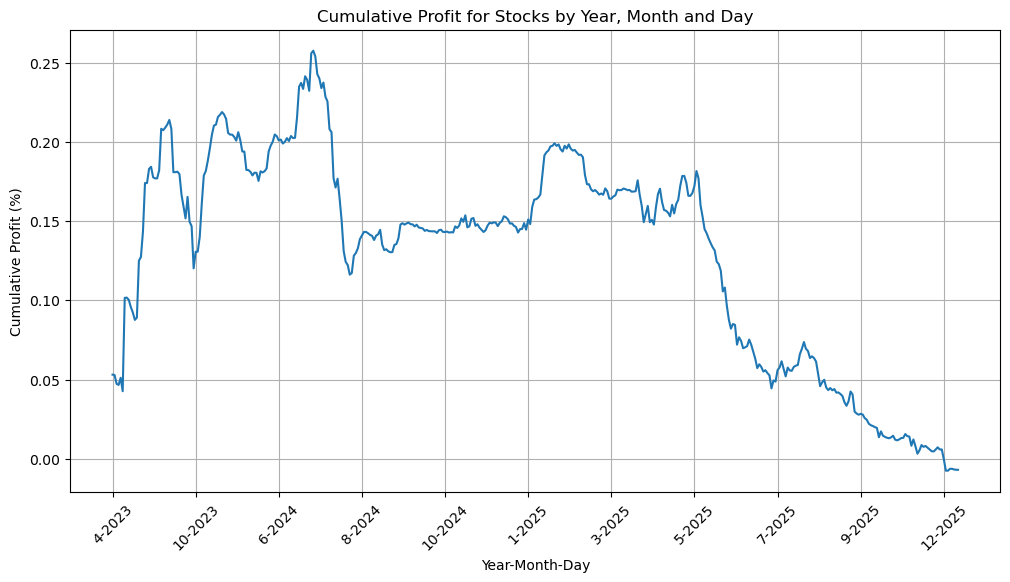

In [218]:
# df_stocks_100 group by Year, Month and day columns
df_stocks_grouped = df_stocks_100.groupby(['Year', 'Month', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_stocks_grouped.columns = ['Year', 'Month', 'Day', 'Profit_pct_100']  

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_stocks_grouped['Cumulative_Profit'] = np.log(1 + df_stocks_grouped['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_stocks_grouped['Day'].astype(str) + '-' + df_stocks_grouped['Month'].astype(str) + '-' + df_stocks_grouped['Year'].astype(str), df_stocks_grouped['Cumulative_Profit']*100)
plt.title('Cumulative Profit for Stocks by Year, Month and Day')
plt.xlabel('Year-Month-Day')
plt.ylabel('Cumulative Profit (%)')
# plt.xticks(rotation=45)
# plt.xticks(ticks=range(0, len(df_stocks_grouped), max(1, len(df_stocks_grouped) // 10)), 
#            labels=(df_stocks_grouped['Day'].astype(str) + '-' + df_stocks_grouped['Month'].astype(str) + '-' + df_stocks_grouped['Year'].astype(str))[::max(1, len(df_stocks_grouped) // 10)], 
#            rotation=45)
plt.xticks(ticks=range(0, len(df_stocks_grouped), max(1, len(df_stocks_grouped) // 10)), 
           labels=(df_stocks_grouped['Month'].astype(str) + '-' + df_stocks_grouped['Year'].astype(str))[::max(1, len(df_stocks_grouped) // 10)], 
           rotation=45)
plt.grid()
plt.show()

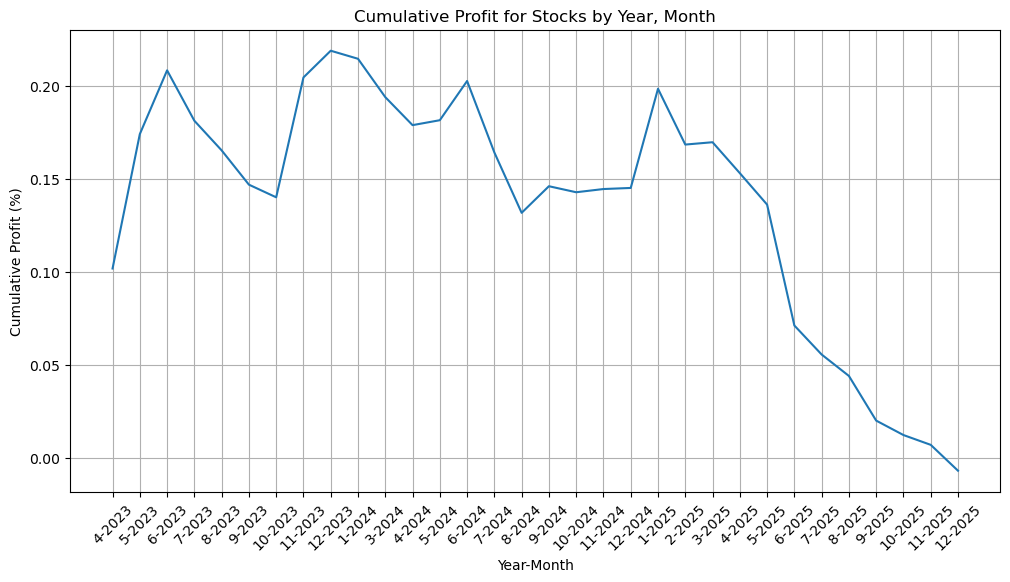

In [219]:
# df_stocks_100 group by Year, Month
df_stocks_grouped_month_year = df_stocks_100.groupby(['Year', 'Month']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_stocks_grouped_month_year.columns = ['Year', 'Month', 'Profit_pct_100']  

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_stocks_grouped_month_year['Cumulative_Profit'] = np.log(1 + df_stocks_grouped_month_year['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_stocks_grouped_month_year['Month'].astype(str) + '-' + df_stocks_grouped_month_year['Year'].astype(str), df_stocks_grouped_month_year['Cumulative_Profit']*100)
plt.title('Cumulative Profit for Stocks by Year, Month')
plt.xlabel('Year-Month')
plt.ylabel('Cumulative Profit (%)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

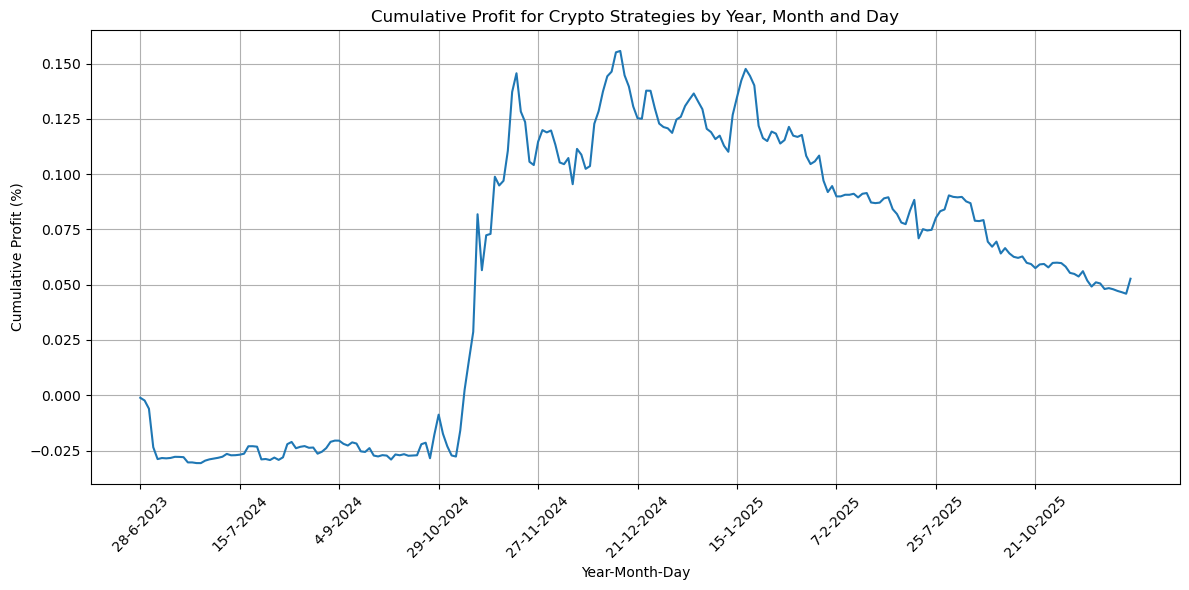

In [220]:
# group df_crypto_100 by Year, Month and Day
df_crypto_grouped = df_crypto_100.groupby(['Year', 'Month', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_crypto_grouped.columns = ['Year', 'Month', 'Day', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_crypto_grouped['Cumulative_Profit'] = np.log(1 + df_crypto_grouped['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_crypto_grouped['Day'].astype(str) + '-' + df_crypto_grouped['Month'].astype(str) + '-' + df_crypto_grouped['Year'].astype(str), df_crypto_grouped['Cumulative_Profit']*100)
plt.title('Cumulative Profit for Crypto Strategies by Year, Month and Day')
plt.xlabel('Year-Month-Day')
plt.ylabel('Cumulative Profit (%)')
plt.xticks(ticks=range(0, len(df_crypto_grouped), max(1, len(df_crypto_grouped) // 10)), 
           labels=(df_crypto_grouped['Day'].astype(str) + '-' + df_crypto_grouped['Month'].astype(str) + '-' + df_crypto_grouped['Year'].astype(str))[::max(1, len(df_crypto_grouped) // 10)], 
           rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [221]:
# Add here Performance of Crypto Strategies against BTC as benchmark

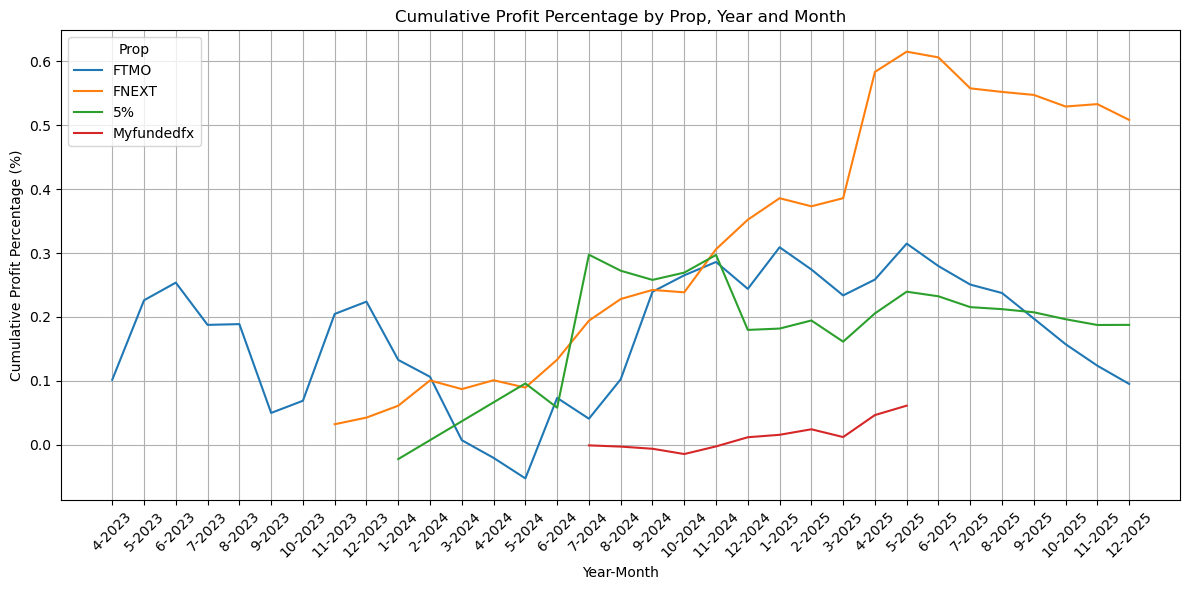

In [222]:
# group by Prop and Month, then plot Cumulative Profit_pct_100
df_prop = df_100.groupby(['Prop', 'Year', 'Month']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_prop.columns = ['Prop', 'Year', 'Month', 'Profit_pct_100']

# sort by Year and Month to ensure chronological order
df_prop = df_prop.sort_values(['Year', 'Month'])

# calculate cumulative Profit_pct_100 by Prop, Year and Month using log returns
df_prop['Cumulative_Profit'] = df_prop.groupby('Prop').apply(
    lambda x: np.log(1 + x['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1
).reset_index(level=0, drop=True)

# plot the data with a line chart
plt.figure(figsize=(12, 6))
for prop in df_prop['Prop'].unique():
    prop_data = df_prop[df_prop['Prop'] == prop]
    plt.plot(prop_data['Month'].astype(str) + '-' + prop_data['Year'].astype(str), prop_data['Cumulative_Profit']*100, label=prop)
plt.title('Cumulative Profit Percentage by Prop, Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Cumulative Profit Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Prop')
plt.grid()
plt.tight_layout()
plt.show()

In [223]:
# Add here profit on founded accounts by prop

In [224]:
# funded.head()

In [225]:
# df_funded = funded[funded['Account_Type'] == 'Funded'].copy()

In [226]:
# # this is not the correct way to calculate the profit for funded accounts, 
# since prop firms pay only 80% of the profit when the account have a positive balance
# this calculation is just the total..

# # calculate sum of Profitto_100 for funded accounts
# sum_profitto_100_funded = df_funded['Profitto_100'].sum()

# # cash out sum, is the 80% of the profit
# cash_out_sum_funded = sum_profitto_100_funded * 0.8

# # print total profit and cash out sum for funded accounts
# print('Total Profit for Funded Accounts (USD):', round(sum_profitto_100_funded, 2))
# print('Cash Out Sum for Funded Accounts (USD):', round(cash_out_sum_funded, 2))

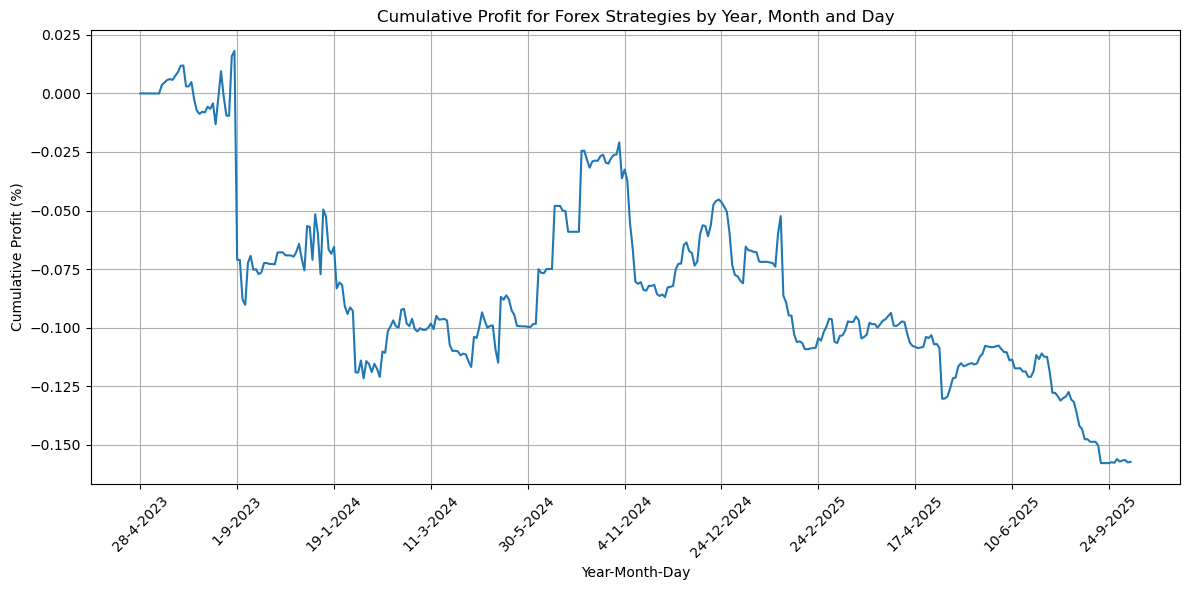

In [227]:
# group df_forex_100 by Year, Month and Day
df_forex_grouped = df_forex_100.groupby(['Year', 'Month', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_forex_grouped.columns = ['Year', 'Month', 'Day', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_forex_grouped['Cumulative_Profit'] = np.log(1 + df_forex_grouped['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_forex_grouped['Day'].astype(str) + '-' + df_forex_grouped['Month'].astype(str) + '-' + df_forex_grouped['Year'].astype(str), df_forex_grouped['Cumulative_Profit']*100)
plt.title('Cumulative Profit for Forex Strategies by Year, Month and Day')
plt.xlabel('Year-Month-Day')
plt.ylabel('Cumulative Profit (%)')
plt.xticks(ticks=range(0, len(df_forex_grouped), max(1, len(df_forex_grouped) // 10)), 
           labels=(df_forex_grouped['Day'].astype(str) + '-' + df_forex_grouped['Month'].astype(str) + '-' + df_forex_grouped['Year'].astype(str))[::max(1, len(df_forex_grouped) // 10)], 
           rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

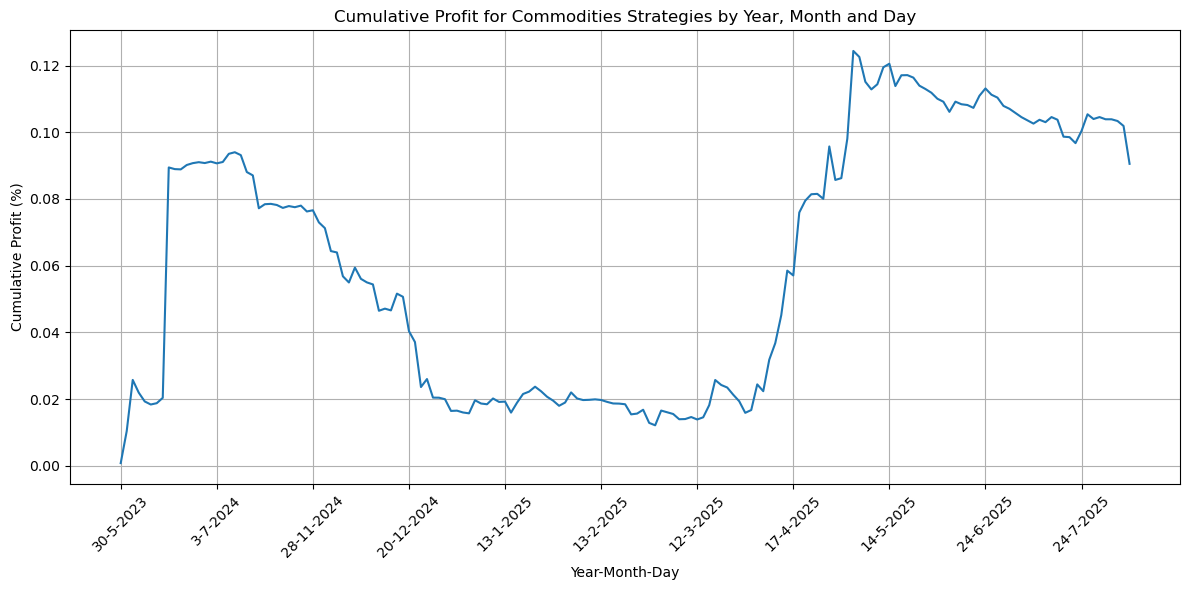

In [228]:
# group df_commodities_100 by Year, Month and Day
df_commodities_grouped = df_commodities_100.groupby(['Year', 'Month', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_commodities_grouped.columns = ['Year', 'Month', 'Day', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_commodities_grouped['Cumulative_Profit'] = np.log(1 + df_commodities_grouped['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_commodities_grouped['Day'].astype(str) + '-' + df_commodities_grouped['Month'].astype(str) + '-' + df_commodities_grouped['Year'].astype(str), df_commodities_grouped['Cumulative_Profit']*100)
plt.title('Cumulative Profit for Commodities Strategies by Year, Month and Day')
plt.xlabel('Year-Month-Day')
plt.ylabel('Cumulative Profit (%)')
plt.xticks(ticks=range(0, len(df_commodities_grouped), max(1, len(df_commodities_grouped) // 10)), 
           labels=(df_commodities_grouped['Day'].astype(str) + '-' + df_commodities_grouped['Month'].astype(str) + '-' + df_commodities_grouped['Year'].astype(str))[::max(1, len(df_commodities_grouped) // 10)], 
           rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [229]:
# Filter by Symbol/Asset and sort by Year, Month, Day
df_nq_sorted = df_dates[df_dates['Simbolo'] == 'US100'].copy()
df_us30_sorted = df_dates[df_dates['Simbolo'] == 'US30'].copy()
df_spx_sorted = df_dates[df_dates['Simbolo'] == 'US500'].copy()
df_stocks_sorted = df_dates[df_dates['Asset'] == 'Stocks'].copy()
df_commodities_sorted = df_dates[df_dates['Asset'] == 'Commodities'].copy()
df_crypto_sorted = df_dates[df_dates['Asset'] == 'Crypto'].copy()

# Sort by date using Year, Month, Day columns
df_nq_sorted = df_nq_sorted.sort_values(['Year', 'Month', 'Day'])
df_us30_sorted = df_us30_sorted.sort_values(['Year', 'Month', 'Day'])
df_spx_sorted = df_spx_sorted.sort_values(['Year', 'Month', 'Day'])
df_stocks_sorted = df_stocks_sorted.sort_values(['Year', 'Month', 'Day'])
df_commodities_sorted = df_commodities_sorted.sort_values(['Year', 'Month', 'Day'])
df_crypto_sorted = df_crypto_sorted.sort_values(['Year', 'Month', 'Day'])

print(f"df_nq_sorted rows: {len(df_nq_sorted)}")
print(f"df_us30_sorted rows: {len(df_us30_sorted)}")
print(f"df_spx_sorted rows: {len(df_spx_sorted)}")
print(f"df_stocks_sorted rows: {len(df_stocks_sorted)}")
print(f"df_commodities_sorted rows: {len(df_commodities_sorted)}")
print(f"df_crypto_sorted rows: {len(df_crypto_sorted)}")

df_nq_sorted rows: 2838
df_us30_sorted rows: 977
df_spx_sorted rows: 3033
df_stocks_sorted rows: 2121
df_commodities_sorted rows: 538
df_crypto_sorted rows: 2230


US100 - Days: 464, Final Return: 0.65%
US30 - Days: 300, Final Return: 0.23%
US500 - Days: 447, Final Return: -0.11%
Stocks - Days: 418, Final Return: -0.01%
Commodities - Days: 169, Final Return: 0.09%
Crypto - Days: 230, Final Return: 0.05%


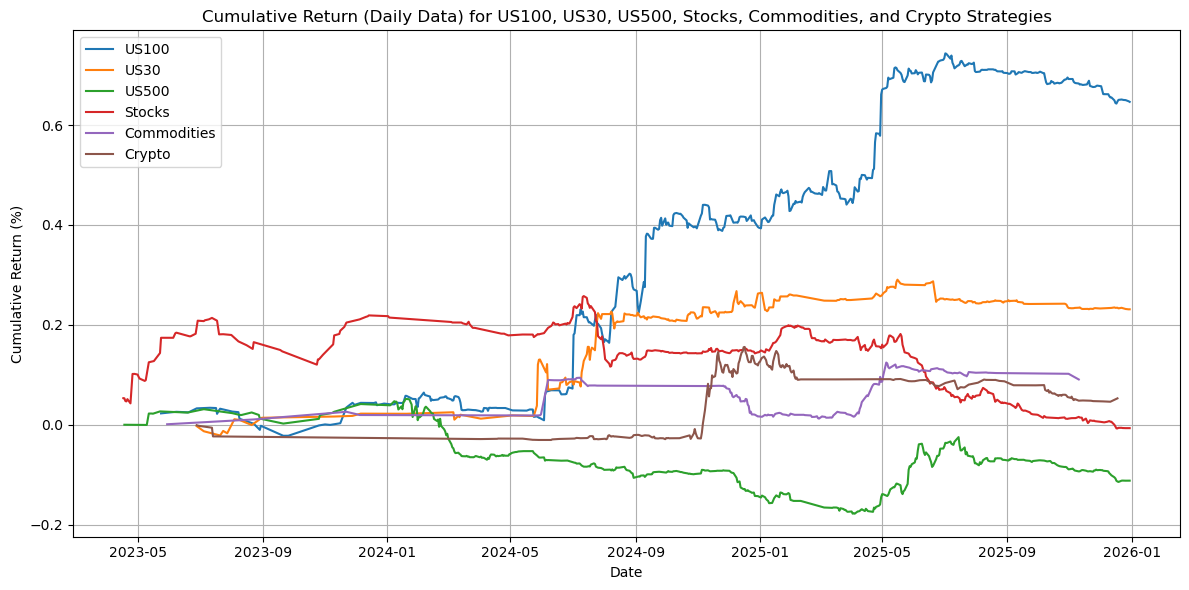

In [230]:
# Same approach as cells 61-62 (group by Year/Month/Day)
# For US100
df_nq_daily = df_nq_sorted.groupby(['Year', 'Month', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()
df_nq_daily['Date'] = pd.to_datetime(df_nq_daily[['Year', 'Month', 'Day']])
df_nq_daily = df_nq_daily.sort_values('Date')
df_nq_daily.rename(columns={'Profit_pct_100': 'Daily_Return_pct'}, inplace=True)
df_nq_daily['Cumulative_Return'] = ((1 + df_nq_daily['Daily_Return_pct'] / 100).cumprod() - 1)

# For US30
df_us30_daily = df_us30_sorted.groupby(['Year', 'Month', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()
df_us30_daily['Date'] = pd.to_datetime(df_us30_daily[['Year', 'Month', 'Day']])
df_us30_daily = df_us30_daily.sort_values('Date')
df_us30_daily.rename(columns={'Profit_pct_100': 'Daily_Return_pct'}, inplace=True)
df_us30_daily['Cumulative_Return'] = ((1 + df_us30_daily['Daily_Return_pct'] / 100).cumprod() - 1)

# For US500
df_spx_daily = df_spx_sorted.groupby(['Year', 'Month', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()
df_spx_daily['Date'] = pd.to_datetime(df_spx_daily[['Year', 'Month', 'Day']])
df_spx_daily = df_spx_daily.sort_values('Date')
df_spx_daily.rename(columns={'Profit_pct_100': 'Daily_Return_pct'}, inplace=True)
df_spx_daily['Cumulative_Return'] = ((1 + df_spx_daily['Daily_Return_pct'] / 100).cumprod() - 1)

# For Stocks
df_stocks_daily = df_stocks_sorted.groupby(['Year', 'Month', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()
df_stocks_daily['Date'] = pd.to_datetime(df_stocks_daily[['Year', 'Month', 'Day']])
df_stocks_daily = df_stocks_daily.sort_values('Date')
df_stocks_daily.rename(columns={'Profit_pct_100': 'Daily_Return_pct'}, inplace=True)
df_stocks_daily['Cumulative_Return'] = ((1 + df_stocks_daily['Daily_Return_pct'] / 100).cumprod() - 1)

# For Commodities
df_commodities_daily = df_commodities_sorted.groupby(['Year', 'Month', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()
df_commodities_daily['Date'] = pd.to_datetime(df_commodities_daily[['Year', 'Month', 'Day']])
df_commodities_daily = df_commodities_daily.sort_values('Date')
df_commodities_daily.rename(columns={'Profit_pct_100': 'Daily_Return_pct'}, inplace=True)
df_commodities_daily['Cumulative_Return'] = ((1 + df_commodities_daily['Daily_Return_pct'] / 100).cumprod() - 1)

# For Crypto
df_crypto_daily = df_crypto_sorted.groupby(['Year', 'Month', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()
df_crypto_daily['Date'] = pd.to_datetime(df_crypto_daily[['Year', 'Month', 'Day']])
df_crypto_daily = df_crypto_daily.sort_values('Date')
df_crypto_daily.rename(columns={'Profit_pct_100': 'Daily_Return_pct'}, inplace=True)
df_crypto_daily['Cumulative_Return'] = ((1 + df_crypto_daily['Daily_Return_pct'] / 100).cumprod() - 1)

# Display summary
print(f"US100 - Days: {len(df_nq_daily)}, Final Return: {df_nq_daily['Cumulative_Return'].iloc[-1]*100:.2f}%")
print(f"US30 - Days: {len(df_us30_daily)}, Final Return: {df_us30_daily['Cumulative_Return'].iloc[-1]*100:.2f}%")
print(f"US500 - Days: {len(df_spx_daily)}, Final Return: {df_spx_daily['Cumulative_Return'].iloc[-1]*100:.2f}%")
print(f"Stocks - Days: {len(df_stocks_daily)}, Final Return: {df_stocks_daily['Cumulative_Return'].iloc[-1]*100:.2f}%")
print(f"Commodities - Days: {len(df_commodities_daily)}, Final Return: {df_commodities_daily['Cumulative_Return'].iloc[-1]*100:.2f}%")
print(f"Crypto - Days: {len(df_crypto_daily)}, Final Return: {df_crypto_daily['Cumulative_Return'].iloc[-1]*100:.2f}%")

# Plot cumulative return for all strategies
plt.figure(figsize=(12, 6))
plt.plot(df_nq_daily['Date'], df_nq_daily['Cumulative_Return']*100, label='US100')
plt.plot(df_us30_daily['Date'], df_us30_daily['Cumulative_Return']*100, label='US30') 
plt.plot(df_spx_daily['Date'], df_spx_daily['Cumulative_Return']*100, label='US500')
plt.plot(df_stocks_daily['Date'], df_stocks_daily['Cumulative_Return']*100, label='Stocks')
plt.plot(df_commodities_daily['Date'], df_commodities_daily['Cumulative_Return']*100, label='Commodities')
plt.plot(df_crypto_daily['Date'], df_crypto_daily['Cumulative_Return']*100, label='Crypto')
plt.title('Cumulative Return (Daily Data) for US100, US30, US500, Stocks, Commodities, and Crypto Strategies')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Analysis from OBB library

In [231]:
# # As a target benchmark, we will use SPY, QQQ, and DIA

# # download data for SPY, QQQ, and DIA from yFinance
# from openbb import obb

# symbols = ['SPY', 'QQQ', 'DIA']
# start_date = '2023-04-01'

# dataframes = []

# for symbol in symbols:
#     try:
#         data = obb.equity.price.historical(
#             symbol=symbol,
#             start_date=start_date,
#             provider="yfinance"
#         ).to_df()
#         data['Symbol'] = symbol
#         dataframes.append(data)
#     except Exception as e:
#         print(f"Failed to fetch data for {symbol}: {str(e)}")

# combined_data = pd.concat(dataframes)
# combined_data = combined_data.reset_index()

# # combined_data.head()

# combined_data_spy = df_sp500.copy()
# combined_data_dia = df_dia.copy()
# combined_data_qqq = df_qqq.copy()

# combined_data_spy['daily_return'] = combined_data_spy['Close'].pct_change()
# combined_data_dia['daily_return'] = combined_data_dia['Close'].pct_change()
# combined_data_qqq['daily_return'] = combined_data_qqq['Close'].pct_change()

# # calculate the cumulative returns using log returns
# combined_data_spy['cumulative_return'] = np.log(1 + combined_data_spy['daily_return']).cumsum().apply(np.exp) - 1
# combined_data_dia['cumulative_return'] = np.log(1 + combined_data_dia['daily_return']).cumsum().apply(np.exp) - 1
# combined_data_qqq['cumulative_return'] = np.log(1 + combined_data_qqq['daily_return']).cumsum().apply(np.exp) - 1

## Analysis from tv library, for SPY Only

In [232]:
from tvDatafeed import TvDatafeed, Interval
from datetime import datetime
import time
import warnings
warnings.filterwarnings("ignore")

# Connessione (se non metti user/password, usa versione guest con limiti)
tv = TvDatafeed()

# Lista ticker (usiamo il formato TradingView corretto!)
stock_exchanges = {
    'SPY': 'AMEX'   # su TradingView SPY è quotato come AMEX:SPY
}

# Get start date from df_dates using Year/Month/Day columns for consistency
df_dates_temp = df_dates.copy()
df_dates_temp['Date_temp'] = pd.to_datetime(df_dates_temp[['Year', 'Month', 'Day']])
start_date = df_dates_temp['Date_temp'].min()

today = datetime.now()
n_bars = (today - start_date).days

print(f"Start date: {start_date}")
print(f"Number of bars to download: {n_bars}")

# Funzione con retry
def download_with_retry(symbol, exchange, retries=3, delay=2):
    for attempt in range(retries):
        try:
            print(f"Downloading {symbol} ({exchange}) attempt {attempt+1}")
            data_tv = tv.get_hist(
                symbol=symbol,
                exchange=exchange,
                interval=Interval.in_daily,
                n_bars=n_bars
            )
            if data_tv is not None and not data_tv.empty:
                print(f"{symbol}: {len(data_tv)} rows downloaded")
                return data_tv
        except Exception as e:
            print(f"Error {symbol}: {e}")
        if attempt < retries - 1:
            time.sleep(delay)
    print(f"Failed {symbol} after {retries} attempts")
    return None

# Download dati
data_dict = {}
failed = []
for stock, exchange in stock_exchanges.items():
    data_tv = download_with_retry(stock, exchange)
    if data_tv is not None:
        data_dict[stock] = data_tv['close']
    else:
        failed.append(stock)

# Combina
if data_dict:
    df_tv = pd.DataFrame(data_dict)
    df_tv.index = pd.to_datetime(df_tv.index)  # assicura datetime index
    print(f"Shape: {df_tv.shape}")
    print(f"Range: {df_tv.index.min()} → {df_tv.index.max()}")
else:
    print("Nessun dato scaricato")

df_sp500 = df_tv.copy()

# rename column to Close
df_sp500.rename(columns={'SPY': 'Close'}, inplace=True)

Start date: 2023-04-17 00:00:00
Number of bars to download: 990
SPY: 990 rows downloaded
Shape: (990, 1)
Range: 2022-01-21 17:30:00 → 2025-12-31 17:30:00


## Analysis from csv file, for SPY Only

In [233]:
# # Get CSV path from environment variables
# path_df_sp500 = os.getenv('path_df_sp500')

# # Use the path from environment
# url = path_df_sp500

# # # read csv file from url   
# # df_sp500 = pd.read_csv(url, sep=',', index_col=0, parse_dates=True)

# # Use this if df_sp500 has been downloaded and saved as a CSV file from yf
# # read csv file from url   
# df_sp500 = pd.read_csv(url, sep=';', index_col=0, parse_dates=True)

# # Assicurati che l'indice sia datetime
# df_sp500.index = pd.to_datetime(df_sp500.index)
# df_sp500.tail()

## Analysis from csv file, for SPY Only (yf format)

In [234]:
# # to complete..................

# # Get CSV path from environment variables
# path_df_sp500 = os.getenv('path_df_sp500')

# # Load the CSV with semicolon separator and MultiIndex columns
# df_sp500 = pd.read_csv(path_df_sp500, sep=';', header=[0,1], index_col=0)

# # Drop any rows that are completely NaN (e.g. 'Date' row)
# df_sp500 = df_sp500.dropna(how='all')

# # Drop the "Ticker" row if it exists
# if 'Ticker' in df_sp500.index:
#     df_sp500 = df_sp500.drop('Ticker')

# # # Debug: check column structure
# # print("Columns:", df_sp500.columns.tolist())
# # print("Column levels:", df_sp500.columns.nlevels)

# # Convert index to datetime
# df_sp500.index = pd.to_datetime(df_sp500.index)

# # Convert all values to float
# df_sp500 = df_sp500.astype(float)

# # Find and keep only the "Close" column (search for Close in any level)
# close_cols = [col for col in df_sp500.columns if 'Close' in str(col)]
# # print("Close columns found:", close_cols)

# if close_cols:
#     df_sp500 = df_sp500[close_cols[0]]  # Take the first Close column found
# else:
#     # Fallback: take the first column if no Close found
#     df_sp500 = df_sp500.iloc[:, 0]

# # Show the result
# df_sp500.head()

In [235]:
# Assicurati che Apri e Chiudi siano datetime
apri_min = pd.to_datetime(df_dates_temp.Date_temp).min()
chiudi_max = pd.to_datetime(df_dates_temp.Date_temp).max()

# keep only DatetimeIndex higher than df_dates['Apri'].min() and lower than end_date = df_dates['Chiudi'].max()
df_sp500 = df_sp500.loc[
    (df_sp500.index >= apri_min) &
    (df_sp500.index <= chiudi_max)
]

#df_sp500.head()

combined_data_spy = df_sp500.copy()

combined_data_spy['daily_return'] = combined_data_spy['Close'].pct_change()

# drop na
combined_data_spy = combined_data_spy.dropna(subset=['daily_return'])

# calculate the cumulative returns using log returns
combined_data_spy['cumulative_return'] = np.log(1 + combined_data_spy['daily_return']).cumsum().apply(np.exp) - 1

combined_data_spy.tail()


,Close,daily_return,cumulative_return
datetime,,,
2025-12-22 17:30:00,684.83,0.006230,0.654419
2025-12-23 17:30:00,687.96,0.004570,0.661980
2025-12-24 17:30:00,690.38,0.003518,0.667826
2025-12-26 17:30:00,690.31,-0.000101,0.667657
2025-12-29 17:30:00,687.85,-0.003564,0.661714


In [236]:
chiudi_max

Timestamp('2025-12-30 00:00:00')

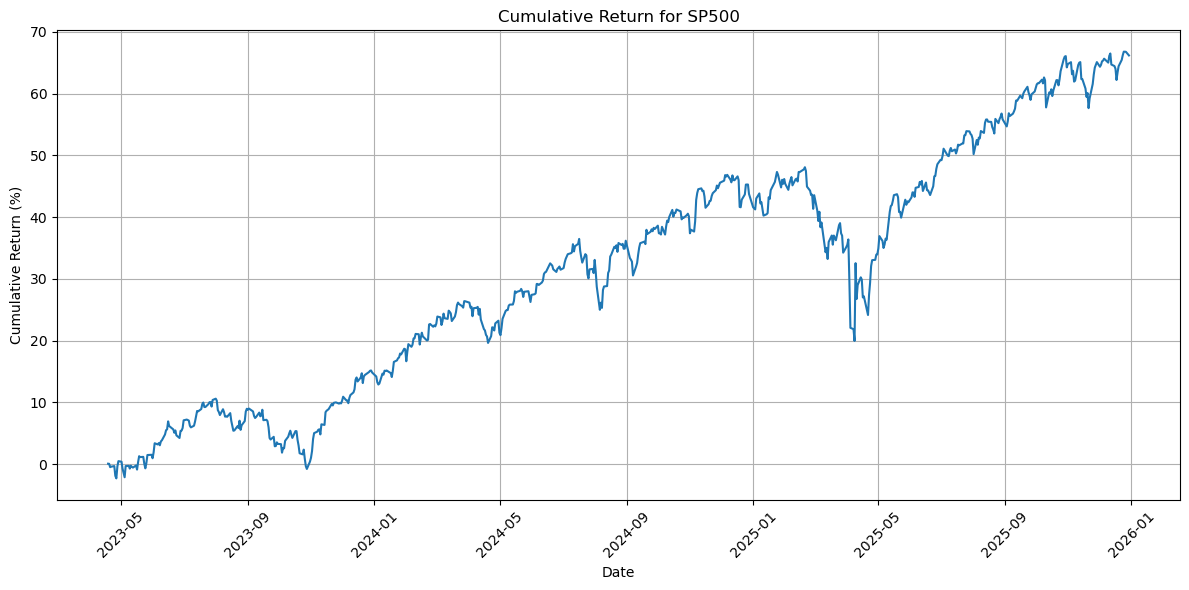

In [237]:
# plot combined_data_spy cumulative_return column
plt.figure(figsize=(12, 6))
plt.plot(combined_data_spy.index, combined_data_spy['cumulative_return']*100, label='SP500')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
plt.title('Cumulative Return for SP500')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

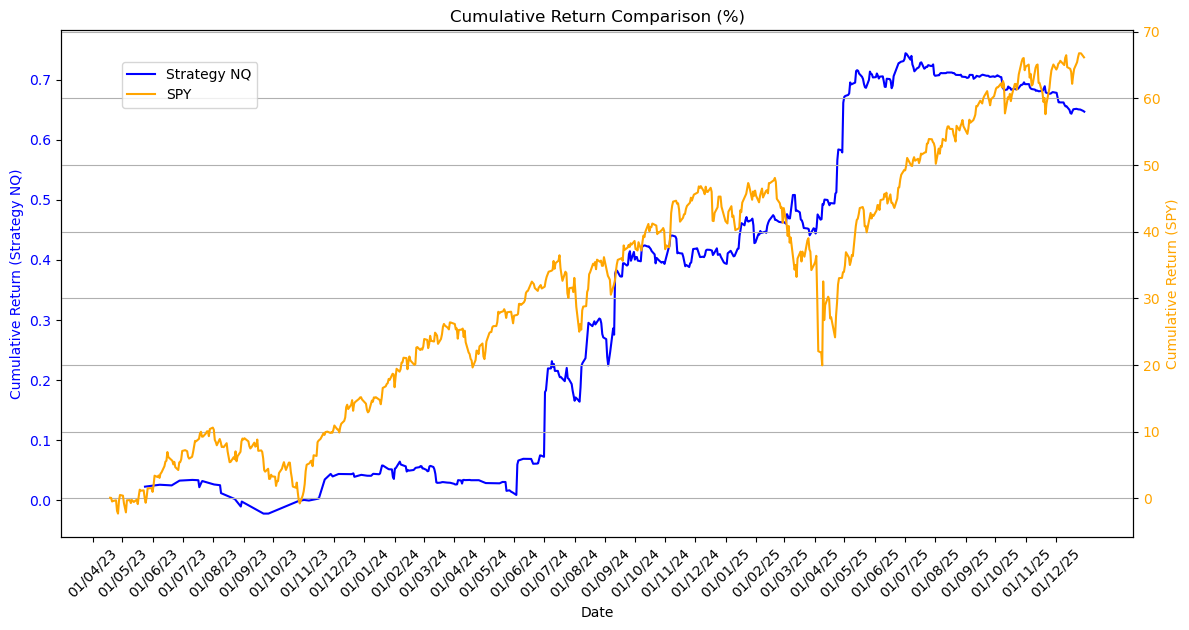

In [238]:
# Use two different y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first dataset on the primary y-axis - USE df_nq_daily
ax1.plot(df_nq_daily['Date'], df_nq_daily['Cumulative_Return']*100, label='Strategy NQ', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Return (Strategy NQ)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for the second dataset
ax2 = ax1.twinx()
ax2.plot(combined_data_spy.index, combined_data_spy['cumulative_return']*100, label='SPY', color='orange')
ax2.set_ylabel('Cumulative Return (SPY)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and legend
plt.title('Cumulative Return Comparison (%)')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid()
plt.tight_layout()

# Tick dell'asse x: una data per ogni mese di SPY
spy_month_starts = combined_data_spy.index.to_period('M').drop_duplicates().to_timestamp()
tick_labels = spy_month_starts.strftime('%d/%m/%y')
ax1.set_xticks(spy_month_starts)
ax1.set_xticklabels(tick_labels, rotation=45)

plt.show()

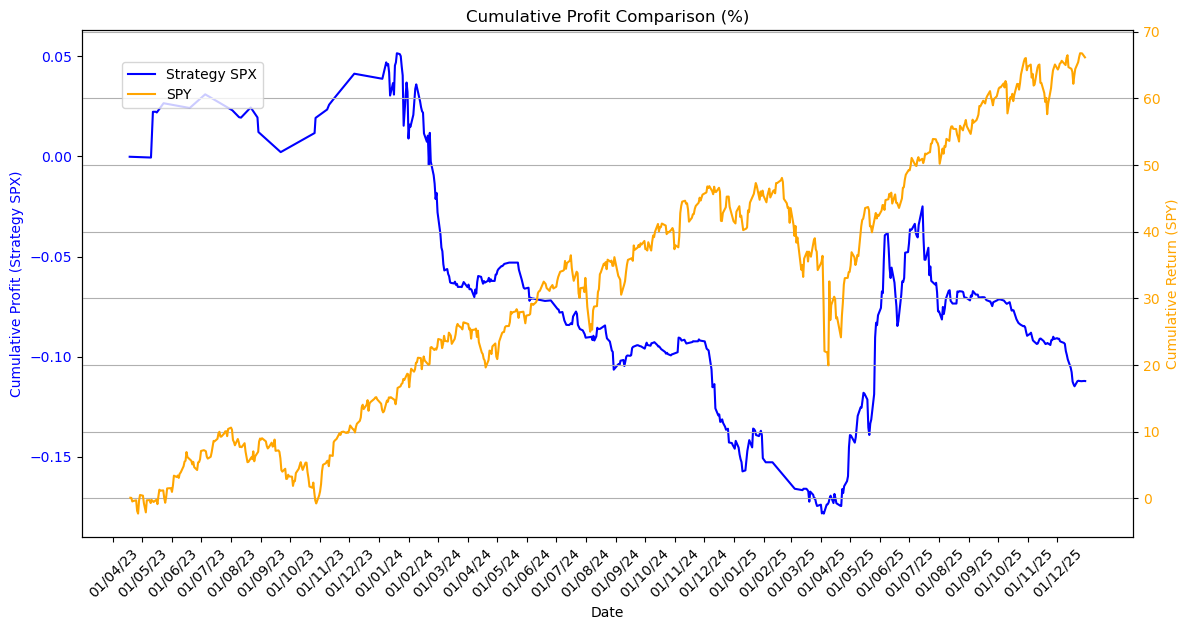

In [239]:
# plot df_spx_grouped e combined_data_spy usando due assi y diversi, con asse x datetime coerente
fig, ax1 = plt.subplots(figsize=(12, 6))

# Crea una colonna datetime per df_spx_grouped
df_spx_grouped['Date'] = pd.to_datetime(df_spx_grouped[['Year', 'Month', 'Day']])

# Plot strategia SPX sull'asse primario
ax1.plot(df_spx_grouped['Date'], df_spx_grouped['Cumulative_Profit']*100, label='Strategy SPX', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Profit (Strategy SPX)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot SPY sull'asse secondario
ax2 = ax1.twinx()
ax2.plot(combined_data_spy.index, combined_data_spy['cumulative_return']*100, label='SPY', color='orange')
ax2.set_ylabel('Cumulative Return (SPY)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Titolo e legenda
plt.title('Cumulative Profit Comparison (%)')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid()
plt.tight_layout()

# Tick dell'asse x: una data per ogni mese di SPY
spy_month_starts = combined_data_spy.index.to_period('M').drop_duplicates().to_timestamp()
tick_labels = spy_month_starts.strftime('%d/%m/%y')
ax1.set_xticks(spy_month_starts)
ax1.set_xticklabels(tick_labels, rotation=45)

plt.show()

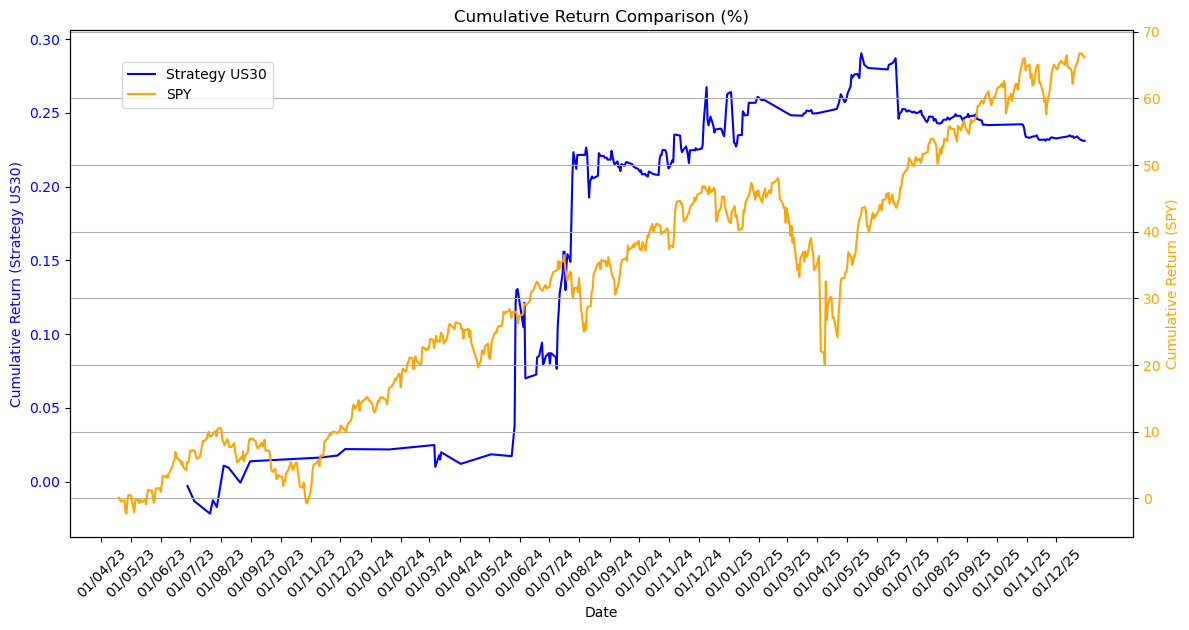

In [240]:
# Calcolo dei log return cumulativi per df_us30_grouped
df_us30_grouped['Date'] = pd.to_datetime(df_us30_grouped[['Year', 'Month', 'Day']])
df_us30_grouped['Cumulative_Return'] = np.log(1 + df_us30_grouped['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# Plot dei dati su due assi y diversi
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primo dataset sull'asse y primario (x = datetime)
ax1.plot(
    df_us30_grouped['Date'],
    df_us30_grouped['Cumulative_Return']*100,
    label='Strategy US30',
    color='blue'
)
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Return (Strategy US30)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Secondo dataset sull'asse y secondario
combined_data_spy.index = pd.to_datetime(combined_data_spy.index)
ax2 = ax1.twinx()
ax2.plot(
    combined_data_spy.index,
    combined_data_spy['cumulative_return']*100,
    label='SPY',
    color='orange'
)
ax2.set_ylabel('Cumulative Return (SPY)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Titolo e legenda
plt.title('Cumulative Return Comparison (%)')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid()
plt.tight_layout()

# Migliora la leggibilità delle etichette dell'asse x: una data per ogni mese, prendendo i mesi da combined_data_spy
spy_month_starts = combined_data_spy.index.to_period('M').drop_duplicates().to_timestamp()
tick_labels = spy_month_starts.strftime('%d/%m/%y')
ax1.set_xticks(spy_month_starts)
ax1.set_xticklabels(tick_labels, rotation=45)

plt.show()

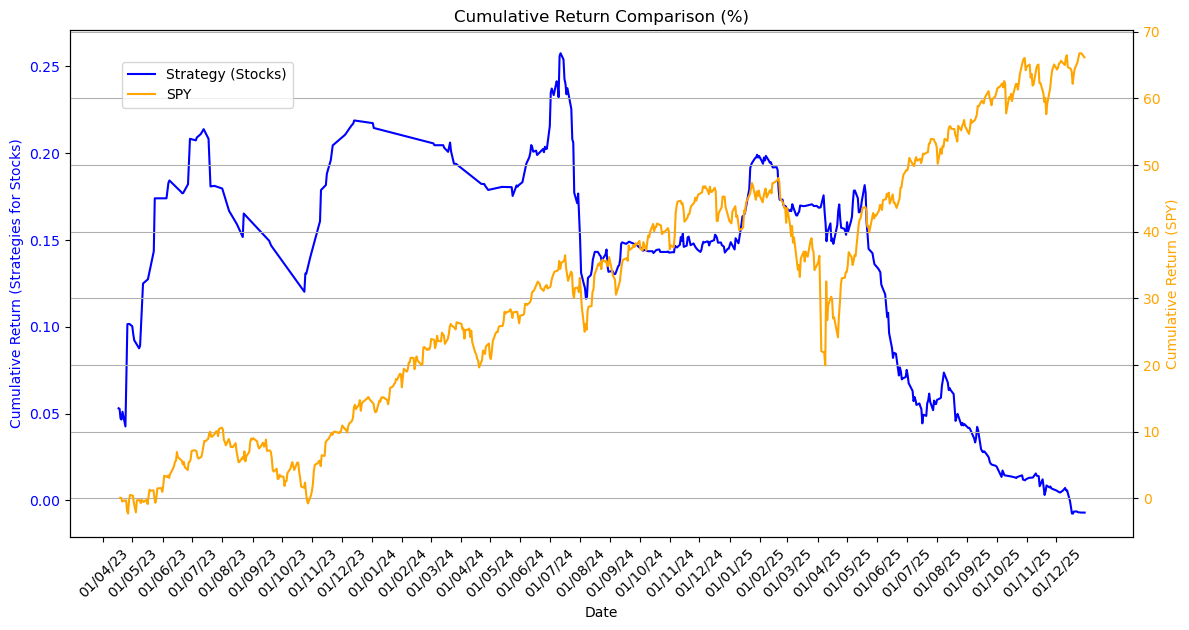

In [241]:
# plot cumulative return for df_stocks_daily and combined_data_spy using dual y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))
# Plot Strategy (Stocks) sull'asse primario - USE df_stocks_daily
ax1.plot(df_stocks_daily['Date'], df_stocks_daily['Cumulative_Return']*100, label='Strategy (Stocks)', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Return (Strategies for Stocks)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crea un asse secondario per SPY
ax2 = ax1.twinx()
ax2.plot(combined_data_spy.index, combined_data_spy['cumulative_return']*100, label='SPY', color='orange')
ax2.set_ylabel('Cumulative Return (SPY)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Titolo e legenda
plt.title('Cumulative Return Comparison (%)')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid()
plt.tight_layout()

# Migliora la leggibilità delle etichette dell'asse x: una data per ogni mese, prendendo i mesi da combined_data_spy
spy_month_starts = combined_data_spy.index.to_period('M').drop_duplicates().to_timestamp()
tick_labels = spy_month_starts.strftime('%d/%m/%y')
ax1.set_xticks(spy_month_starts)
ax1.set_xticklabels(tick_labels, rotation=45)

plt.show()

In [242]:
# Use df_dates to match cell 61-62 exactly - group by Year/Month/Day
df_total_strategies = df_dates.copy()

# Use the SAME grouping approach as cell 61: group by Year, Month, Day columns
df_total_strategies_daily = df_total_strategies.groupby(['Year', 'Month', 'Day']).agg({
    'Profit_pct_100': 'sum'
}).reset_index()

# Create a proper date column for better x-axis formatting
df_total_strategies_daily['Date'] = pd.to_datetime(df_total_strategies_daily[['Year', 'Month', 'Day']])

# Sort by date
df_total_strategies_daily = df_total_strategies_daily.sort_values('Date')

# Rename column to match the plot labels
df_total_strategies_daily.rename(columns={'Profit_pct_100': 'Daily_Return_pct'}, inplace=True)

# Use STANDARD COMPOUNDING (same as cell 61)
df_total_strategies_daily['Cumulative_Return'] = ((1 + df_total_strategies_daily['Daily_Return_pct'] / 100).cumprod() - 1)

print(f"Days in df_total_strategies_daily: {len(df_total_strategies_daily)}")
print(f"Total daily return sum: {df_total_strategies_daily['Daily_Return_pct'].sum():.6f}")
print(f"Final cumulative return: {df_total_strategies_daily['Cumulative_Return'].iloc[-1] * 100:.4f}%")

df_total_strategies_daily.head(10)

Days in df_total_strategies_daily: 693
Total daily return sum: 0.851768
Final cumulative return: 0.8545%


,Year,Month,Day,Daily_Return_pct,Date,Cumulative_Return
0,2023,4,17,0.053095,2023-04-17,0.000531
1,2023,4,18,-0.000460,2023-04-18,0.000526
2,2023,4,19,-0.005545,2023-04-19,0.000471
3,2023,4,20,-0.000670,2023-04-20,0.000464
4,2023,4,21,0.004506,2023-04-21,0.000509
5,2023,4,24,-0.008464,2023-04-24,0.000425
6,2023,4,26,0.058882,2023-04-26,0.001014
7,2023,4,28,0.000161,2023-04-28,0.001015
8,2023,5,1,-0.001394,2023-05-01,0.001001
9,2023,5,2,-0.004528,2023-05-02,0.000956


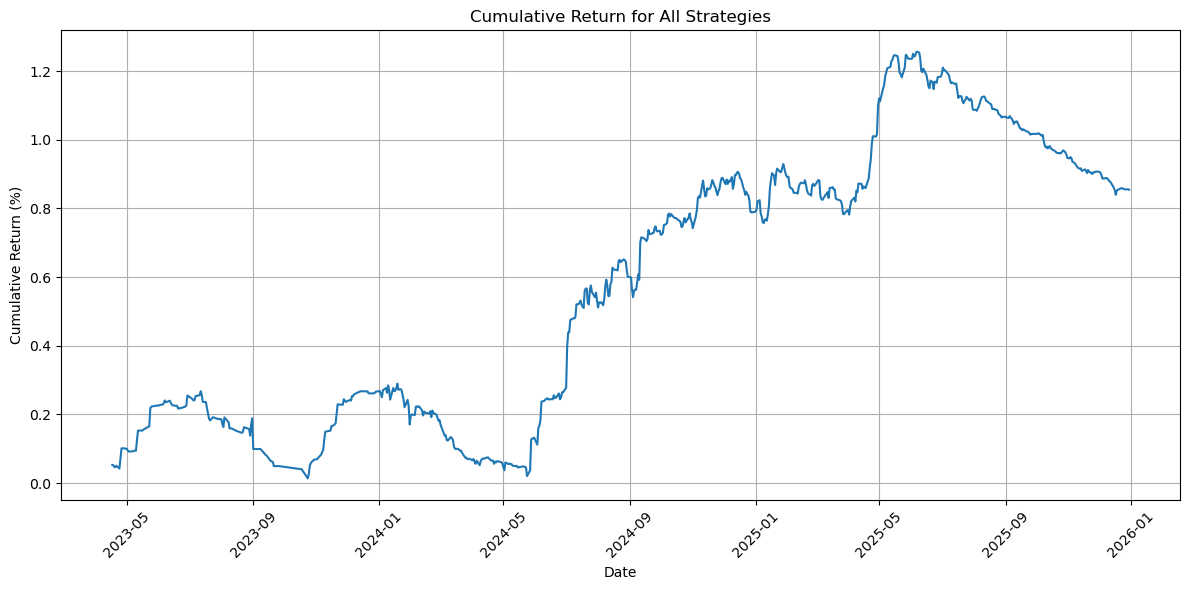

In [243]:
# plot df_total_strategies_daily
plt.figure(figsize=(12, 6))
plt.plot(df_total_strategies_daily['Date'], df_total_strategies_daily['Cumulative_Return']*100)
plt.title('Cumulative Return for All Strategies')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

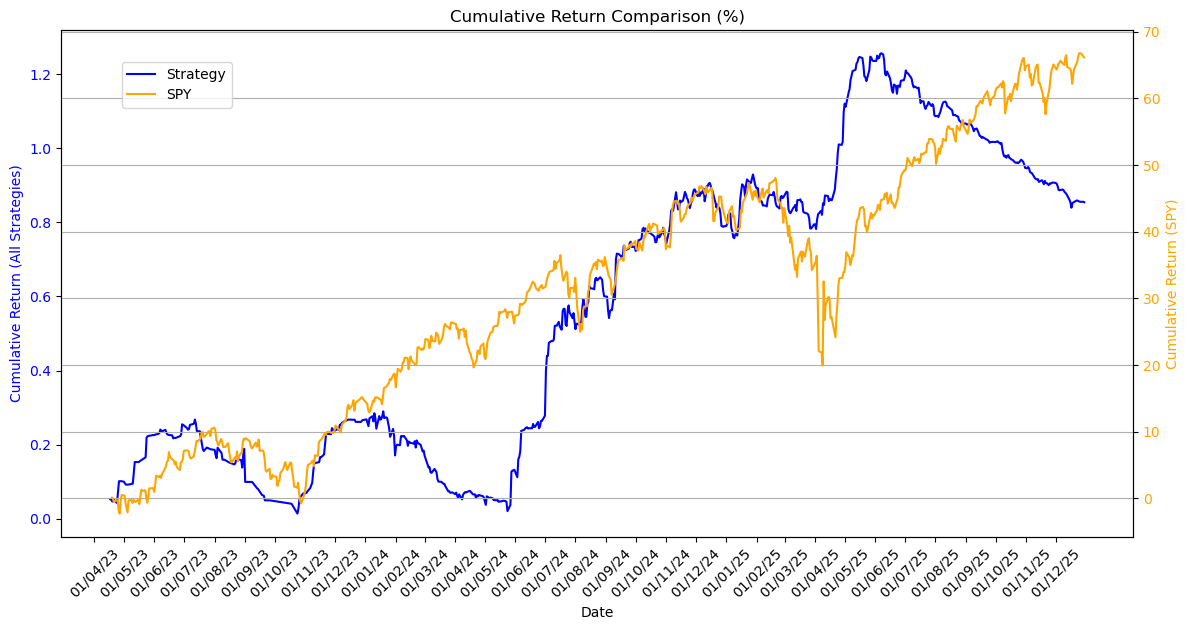

In [244]:
# plot df_total_strategies_daily and combined_data_spy using two different y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))
# Plot the first dataset on the primary y-axis - USE df_total_strategies_daily
ax1.plot(df_total_strategies_daily['Date'], df_total_strategies_daily['Cumulative_Return']*100, label='Strategy', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Return (All Strategies)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for the second dataset
ax2 = ax1.twinx()
ax2.plot(combined_data_spy.index, combined_data_spy['cumulative_return']*100, label='SPY', color='orange')
ax2.set_ylabel('Cumulative Return (SPY)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and legend
plt.title('Cumulative Return Comparison (%)')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid()
plt.tight_layout()

# Migliora la leggibilità delle etichette dell'asse x
spy_month_starts = combined_data_spy.index.to_period('M').drop_duplicates().to_timestamp()
tick_labels = spy_month_starts.strftime('%d/%m/%y')
ax1.set_xticks(spy_month_starts)
ax1.set_xticklabels(tick_labels, rotation=45)

plt.show()

In [245]:
# df_total_strategies.info()

# drop na
combined_data_spy = combined_data_spy.dropna()

combined_data_spy.head()

,Close,daily_return,cumulative_return
datetime,,,
2023-04-18 16:30:00,414.21,0.000652,0.000652
2023-04-19 16:30:00,414.14,-0.000169,0.000483
2023-04-20 16:30:00,411.88,-0.005457,-0.004977
2023-04-21 16:30:00,412.20,0.000777,-0.004204
2023-04-24 16:30:00,412.63,0.001043,-0.003165


In [246]:
# Calculate the maximum drawdown of spy
daily_returns_spy = combined_data_spy['Close'].pct_change()

cumulative_returns_spy = (1 + daily_returns_spy).cumprod() # here in internet they add -1

cumulative_max_spy = cumulative_returns_spy.cummax()

drawdown_spy = (cumulative_returns_spy - cumulative_max_spy) / cumulative_max_spy

max_drawdown_spy = drawdown_spy.min()
print(f"Max Drawdown: {max_drawdown_spy:.2%}")

Max Drawdown: -19.00%


In [247]:
# # Ok, correct
# # plot cumulative_returns_spy
# plt.figure(figsize=(12, 6))
# plt.plot(cumulative_returns_spy)
# plt.title('Cumulative Returns for SPY')
# plt.xlabel('Date')
# plt.ylabel('Cumulative Returns')
# plt.xticks(rotation=45)
# plt.grid()
# plt.tight_layout()
# plt.show()

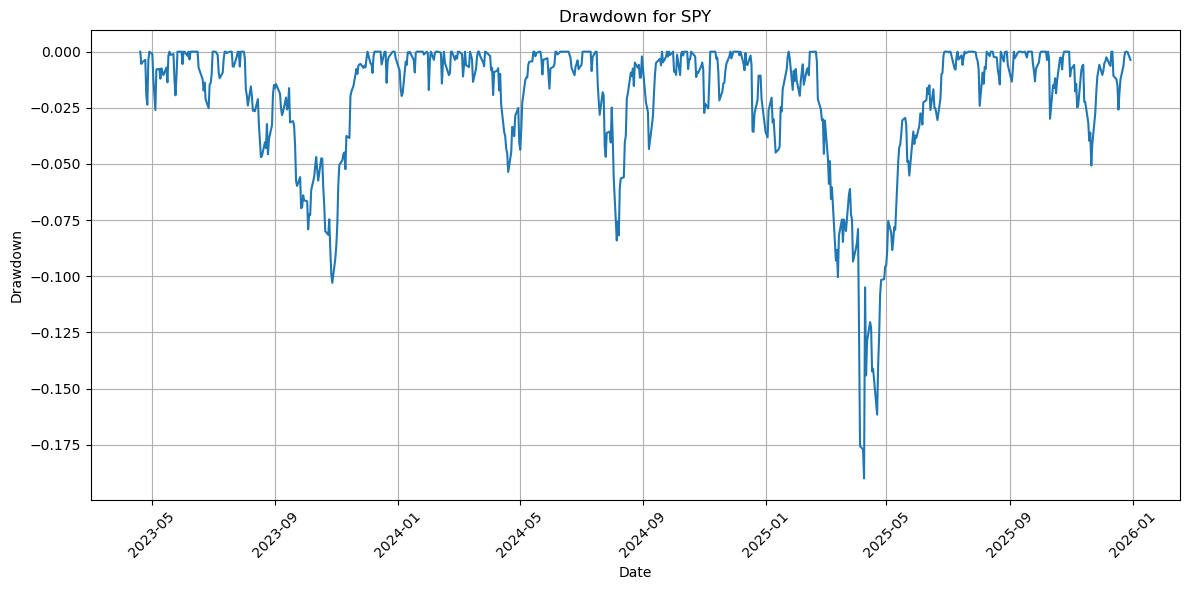

In [248]:
# plot drawdown_spy
plt.figure(figsize=(12, 6))
plt.plot(drawdown_spy)
plt.title('Drawdown for SPY')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [249]:
# Use the already aggregated daily data from cell 125
daily_returns_strategies = df_total_strategies_daily[['Date', 'Daily_Return_pct']].copy()

# set index to Date
daily_returns_strategies = daily_returns_strategies.set_index('Date')

# rename column
daily_returns_strategies.columns = ['Profit_pct_100']

daily_returns_strategies.head()

,Profit_pct_100
Date,
2023-04-17,0.053095
2023-04-18,-0.000460
2023-04-19,-0.005545
2023-04-20,-0.000670
2023-04-21,0.004506


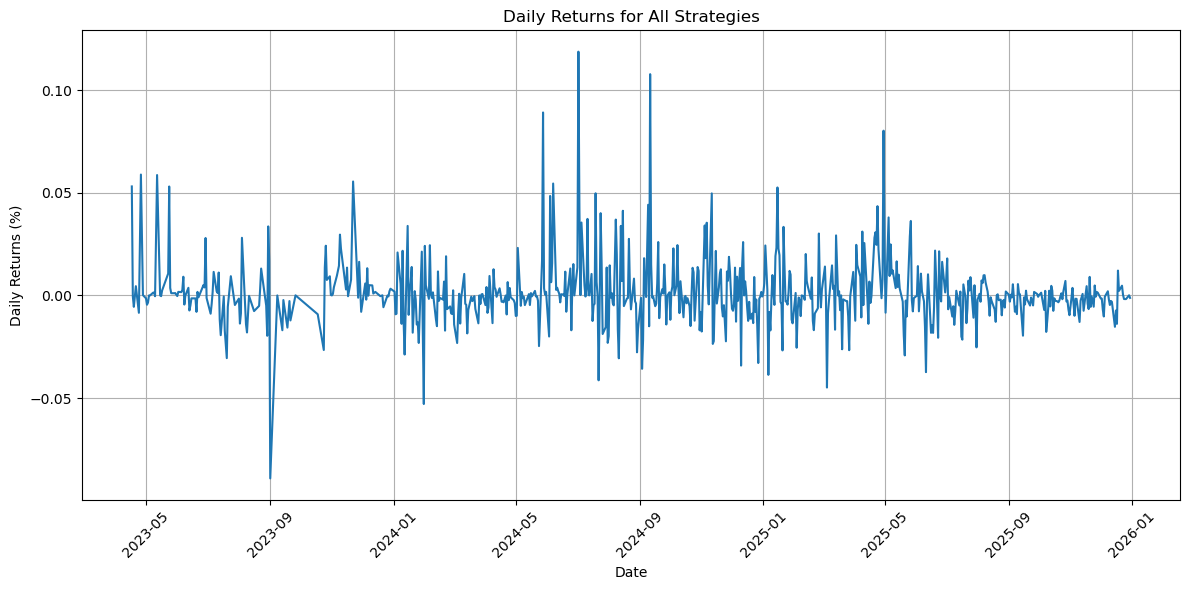

In [250]:
# plot daily_returns_strategies.Profit_pct_100
plt.figure(figsize=(12, 6))
plt.plot(daily_returns_strategies.index, daily_returns_strategies['Profit_pct_100'])
plt.title('Daily Returns for All Strategies')
plt.xlabel('Date')
plt.ylabel('Daily Returns (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

## Download here the csv daily_returns_spy and daily_returns_strategies for quantstats analysis

## Don't forget to change the code at the beginning of the notebook before downloading the csv files

In [251]:
# Get paths from environment variables
path_daily_returns_spy = os.getenv('path_daily_returns_spy')
path_daily_returns_strategies = os.getenv('path_daily_returns_strategies')

# download daily_returns_spy and daily_returns_strategies to csv files
daily_returns_spy.to_csv(path_daily_returns_spy, index=True, sep=';')
daily_returns_strategies.to_csv(path_daily_returns_strategies, index=True, sep=';')

In [252]:
# df_total_strategies_sorted.head()

## Below cell can be used only if we use the quantstats version of data at the beginning of the notebook

In [253]:
# # Use only with quantstats version of the notebook

# cumulative_returns_strategies = (1 + daily_returns_strategies).cumprod()  # here in internet they add -1 

# cumulative_max_strategies = cumulative_returns_strategies.cummax()

# drawdown_strategies = (cumulative_returns_strategies - cumulative_max_strategies) / cumulative_max_strategies

# max_drawdown_strategies = drawdown_strategies.min().min()
# print(f"Max Drawdown: {max_drawdown_strategies:.2%}")
# # print(f"Max Drawdown: {max_drawdown_strategies:.2%}")

## Pyfolio analysis (to complete.. see separate notebook for the full analysis)

In [254]:
# from pyfolio.plotting import (plot_perf_stats, show_perf_stats)
# from pyfolio.timeseries import perf_stats

In [255]:
# # df_total_strategies keep only column Profit_pct_100 and drop na values
# df_total_strategies = df_total_strategies[['Profit_pct_100']].dropna()

# # df combined_data_spy keep only column daily_return and drop na values
# combined_data_spy = combined_data_spy[['daily_return']].dropna()

In [256]:
# df_total_strategies.head()
# combined_data_spy.sample(10)

In [257]:
# combined_data_spy.info()

In [258]:
# # remove nan values
# returns = df_total_strategies['Profit_pct_100']
# factor_returns = combined_data_spy['daily_return']

# perf_stats(returns=returns, factor_returns=factor_returns)


## Final Download

In [259]:
# # Get download path from environment variables
# path_prop_download = os.getenv('path_prop_download')

# # download the file as CSV
# df.to_csv(os.path.join(path_prop_download, 'full_db', '251231_PROP_full_history_db.csv'), index=False, sep=';')